In [1]:
import plotly
import plotly.offline as py
import numpy as np
import plotly.graph_objs as go
import plotly.express as px
from plotly.subplots import make_subplots

#setting offilne
plotly.offline.init_notebook_mode(connected=True)

In [2]:
from google.cloud import storage
import pandas as pd
import numpy as np
import datetime
import time
from itertools import groupby

In [3]:
delivery_clean_df = pd.read_csv("clean_clean_MA_version.csv", sep = ',')

In [4]:
import pandas_profiling
delivery_EDA =pandas_profiling.ProfileReport(delivery_clean_df)

In [38]:
delivery_clean_df.count()

MA                          3769092
PROD_CD                     3769092
BRAND                       3769092
PLU_RETAIL_PRICE            3769092
ORDER_STORE                 3769092
ORDER_DATE                  3769092
DELIVERY_DATE               3769092
OUTCODE                     3769092
DLC                         3769092
SRV_TYPS                    3769092
DELIVERY_CHARGE             3769092
CUSTOMER_SEGMENT            3769092
VOLUME                      3769092
BAND_FIFTY                  3769092
BOX_TYPE                    3769092
LEAD_TIME                   3769092
DELIVERY_WEEK               3769092
DELIVERY_WEEKDAY_WEEKEND    3769092
WEEE                        3769092
AREA                        3769092
D_OR_Q                      3769092
Installation                3769092
MA_CLEAN                    3769092
dtype: int64

In [39]:
delivery_clean_df.head(5)

MA   PROD_CD BRAND  PLU_RETAIL_PRICE  ORDER_STORE  ORDER_DATE  \
0  WASHER DRYERS 167925.00   SME            923.00         4944  2019-02-01   
1    DISHWASHERS 502663.00   MEI           1174.99         2425  2020-03-05   
2    DISHWASHERS 249066.00   AEG            929.00         4944  2019-11-05   
3    DISHWASHERS 507100.00   MEI           1044.99         4944  2020-03-07   
4    DISHWASHERS 507100.00   MEI           1044.99         4944  2020-03-10   

  DELIVERY_DATE OUTCODE      DLC SRV_TYPS  ...  BAND_FIFTY  BOX_TYPE  \
0    2019-02-07     EN6 74230.00       QI  ...      950.00   BIG BOX   
1    2020-03-09    BN15 74260.00        D  ...     1200.00   BIG BOX   
2    2019-11-06     SK6 74470.00        D  ...      950.00   BIG BOX   
3    2020-03-12    WV10 74290.00       DN  ...     1050.00   BIG BOX   
4    2020-03-11    GU32 74215.00       DS  ...     1050.00   BIG BOX   

   LEAD_TIME  DELIVERY_WEEK DELIVERY_WEEKDAY_WEEKEND  WEEE  AREA  D_OR_Q  \
0          6              4                        1     0    EN       Q   
1          4              1                        1     0    BN       D   
2          1              3                        1     0    SK       D   
3          5              4                        1     1    WV       D   
4          1              3                        1     1    GU       D   

   Installation       MA_CLEAN  
0             1  WASHER DRYERS  
1             0    DISHWASHERS  
2             0    DISHWASHERS  
3             1    DISHWASHERS  
4             0    DISHWASHERS  

[5 rows x 23 columns]

In [40]:
pd.set_option('display.float_format',lambda x : '%.2f' % x)
delivery_clean_df.describe()

PROD_CD  PLU_RETAIL_PRICE  ORDER_STORE        DLC  DELIVERY_CHARGE  \
count 3769092.00        3769092.00   3769092.00 3769092.00       3769092.00   
mean   252865.71            378.99      3596.70   74345.75            19.58   
std    139762.85            310.85      1304.10     148.18            25.92   
min       629.00             12.97        13.00   74110.00             0.00   
25%    182027.00            219.00      2320.00   74230.00             0.00   
50%    229100.00            299.00      2868.00   74290.00            10.00   
75%    247097.00            410.00      4944.00   74470.00            30.00   
max    999279.00          14999.00      7017.00   74660.00           120.00   

       CUSTOMER_SEGMENT     VOLUME  BAND_FIFTY  LEAD_TIME  DELIVERY_WEEK  \
count        3769092.00 3769092.00  3769092.00 3769092.00     3769092.00   
mean               4.05       1.00      977.37       5.83           3.01   
std                2.29       0.00    12129.73       4.41           2.01   
min                0.00       1.00       50.00       0.00           0.00   
25%                2.00       1.00      250.00       3.00           1.00   
50%                4.00       1.00      300.00       5.00           3.00   
75%                6.00       1.00      450.00       7.00           5.00   
max                7.00       1.00   250000.00      30.00           6.00   

       DELIVERY_WEEKDAY_WEEKEND       WEEE  Installation  
count                3769092.00 3769092.00    3769092.00  
mean                       0.71       0.30          0.22  
std                        0.45       0.46          0.41  
min                        0.00       0.00          0.00  
25%                        0.00       0.00          0.00  
50%                        1.00       0.00          0.00  
75%                        1.00       1.00          0.00  
max                        1.00       1.00          1.00

# Basic Exploratory Research

In [41]:
length_full = len(delivery_clean_df)

In [42]:
DELIVERY_WEEK_group_df = delivery_clean_df.groupby(['DELIVERY_WEEK']).count()

DELIVERY_WEEK_group_df = pd.DataFrame(DELIVERY_WEEK_group_df)

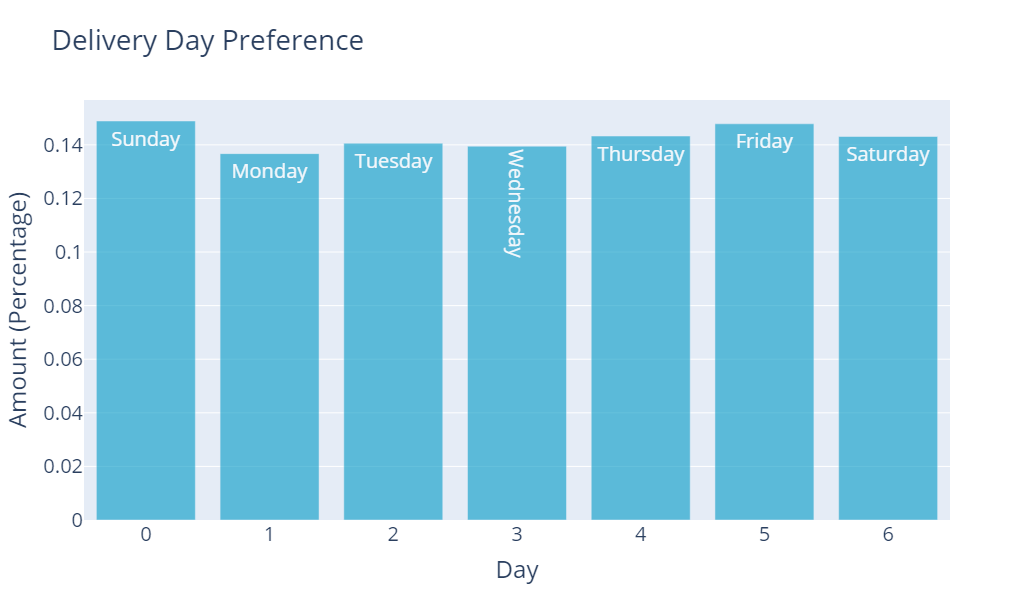

In [43]:
trace1 = go.Bar(
    x = DELIVERY_WEEK_group_df.index.values,
    y = DELIVERY_WEEK_group_df['PROD_CD']/length_full,
    name = "DELIVERY_WEEK",
    marker_color='#0099C6',
    opacity=0.6,
    textposition='auto',
    text = ['Sunday', 'Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'])
data = [trace1]
layout = go.Layout(barmode = "group", title="Delivery Day Preference",
                   xaxis= dict(title= 'Day',ticklen= 5,zeroline= False), 
                   yaxis= dict(title= 'Amount (Percentage)',ticklen= 5,zeroline= False),
                   width=1200,height=600,font_size=20,titlefont_size=28)
fig = go.Figure(data = data, layout = layout)
fig.show()
#This is Figure 11 in the dissertation

###### No big difference among days

In [44]:
DELIVERY_DORQ_group_df = delivery_clean_df.groupby(['D_OR_Q']).count()

DELIVERY_DORQ_group_df = pd.DataFrame(DELIVERY_DORQ_group_df)

In [45]:
delivery_clean_df.groupby('D_OR_Q')['MA'].count()

D_OR_Q
D    3371378
Q     397714
Name: MA, dtype: int64

In [46]:
D_vs_Q = 3461225/420757
print(D_vs_Q)

8.22618518527321


[1565113, 1806265, 88111, 309603]


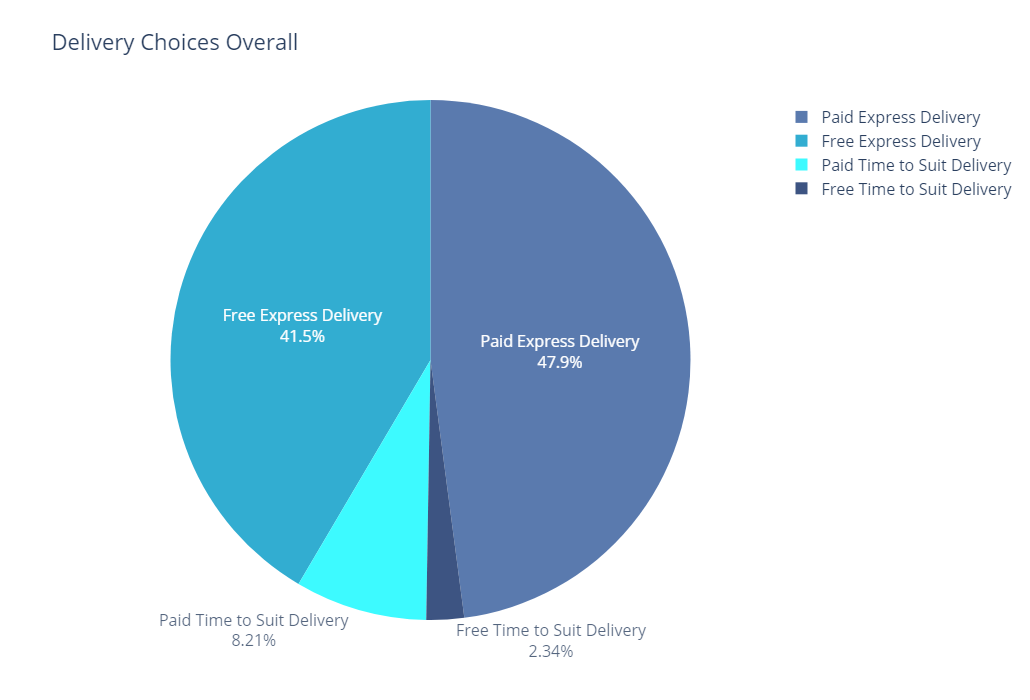

In [47]:
values=[]
labels=[]
values.append(delivery_clean_df.loc[(delivery_clean_df['DELIVERY_CHARGE']==0)&(delivery_clean_df['D_OR_Q'] == 'D'),'PROD_CD'].count())
values.append(delivery_clean_df.loc[(delivery_clean_df['DELIVERY_CHARGE']>0)&(delivery_clean_df['D_OR_Q'] == 'D'),'PROD_CD'].count())
values.append(delivery_clean_df.loc[(delivery_clean_df['DELIVERY_CHARGE']==0)&(delivery_clean_df['D_OR_Q'] == 'Q'),'PROD_CD'].count())
values.append(delivery_clean_df.loc[(delivery_clean_df['DELIVERY_CHARGE']>0)&(delivery_clean_df['D_OR_Q'] == 'Q'),'PROD_CD'].count())

labels=['Free Express Delivery','Paid Express Delivery', 'Free Time to Suit Delivery', 'Paid Time to Suit Delivery']
print(values)

trace1 = go.Pie(
    values = values,
    labels = labels,
    opacity=0.8,
    textinfo='label+percent',
    marker_colors = ['#0099C6','#325A9B','#0D2A63','#0DF9FF'],
    name = "Delivery Charge")

data = [trace1]
layout = go.Layout(title="Delivery Choices Overall",
                   width=700,height=700,font_size=16)
fig = go.Figure(data = data, layout = layout)
fig.show()
#This is Figure 9 in the dissertation

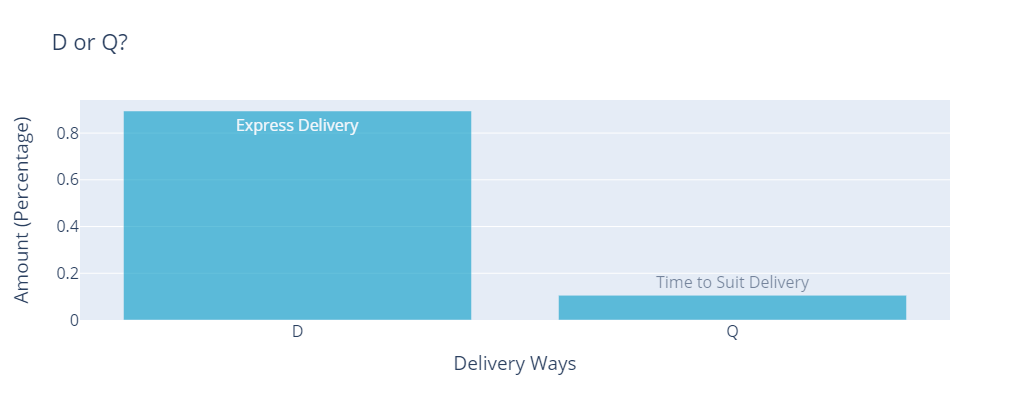

In [48]:
trace1 = go.Bar(
    x = DELIVERY_DORQ_group_df.index.values,
    y = DELIVERY_DORQ_group_df['PROD_CD']/length_full,
    name = "DELIVERY_WAY",
    marker_color='#0099C6',
    opacity=0.6,
    textposition='auto',
    text = ['Express Delivery','Time to Suit Delivery'])
data = [trace1]
layout = go.Layout(barmode = "group", title="D or Q?",
                   xaxis= dict(title= 'Delivery Ways',ticklen= 5,zeroline= False), 
                   yaxis= dict(title= 'Amount (Percentage)',ticklen= 5,zeroline= False),
                   width=600,height=400,font_size=16)
fig = go.Figure(data = data, layout = layout)
fig.show()
#Not used in the dissertation

###### Most customers choose D

In [49]:
DELIVERY_AREA_group_df = delivery_clean_df.groupby(['AREA']).count()

DELIVERY_AREA_group_df = pd.DataFrame(DELIVERY_AREA_group_df)

In [50]:
DELIVERY_AREA_group_df = DELIVERY_AREA_group_df.sort_values(by='MA',ascending = False)

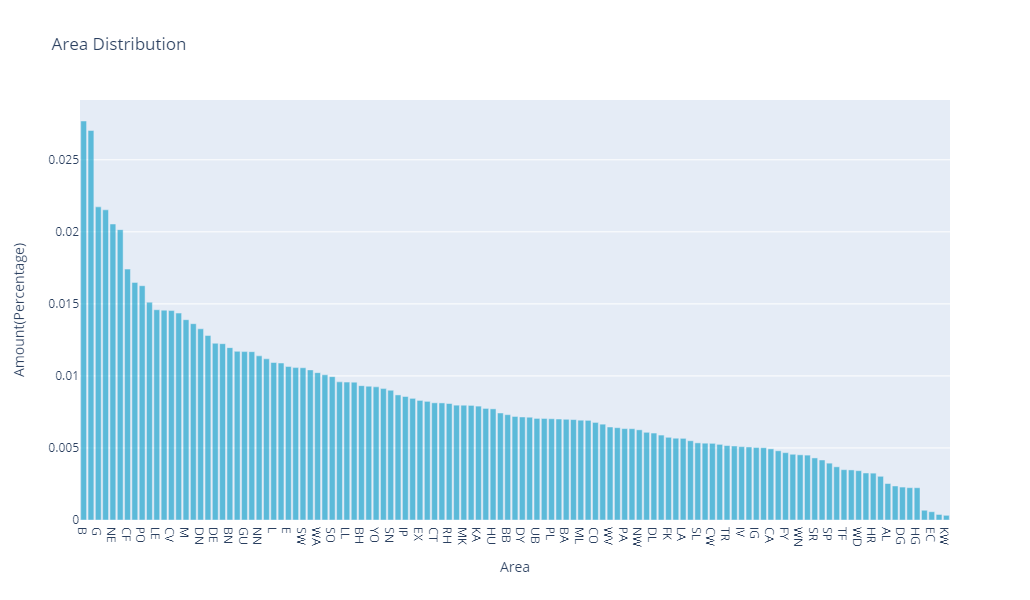

In [51]:
trace1 = go.Bar(
    x = DELIVERY_AREA_group_df.index.values,
    y = DELIVERY_AREA_group_df['PROD_CD']/length_full,
    name = "DELIVERY_AREA",
    marker_color='#0099C6',
    opacity=0.6,
    text = DELIVERY_AREA_group_df.index.values,)
data = [trace1]
layout = go.Layout(barmode = "group", title="Area Distribution",
                   xaxis= dict(title= 'Area',ticklen= 5,zeroline= False), 
                   yaxis= dict(title= 'Amount(Percentage)',ticklen= 5,zeroline= False),
                   width=1200,height=600)
fig = go.Figure(data = data, layout = layout)
fig.show()
#This is Figure 16 in the dissertation

In [52]:
DELIVERY_LEADTIME_group_df = delivery_clean_df.groupby(['LEAD_TIME']).count()

DELIVERY_LEADTIME_group_df = pd.DataFrame(DELIVERY_LEADTIME_group_df)

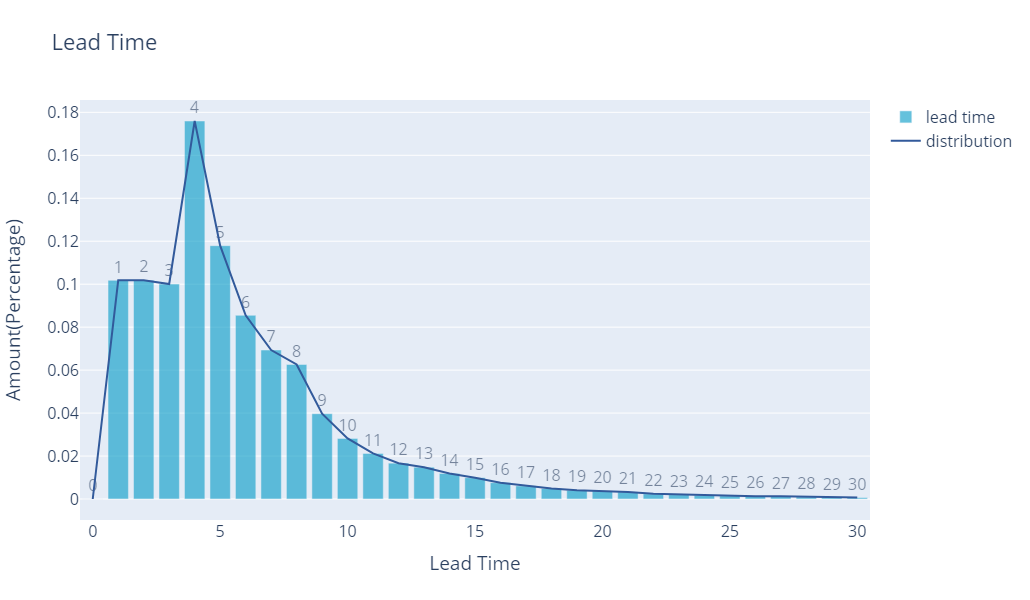

In [53]:
trace1 = go.Bar(
    x = DELIVERY_LEADTIME_group_df.index.values,
    y = DELIVERY_LEADTIME_group_df['PROD_CD']/length_full,
    name = "lead time",
    marker_color='#0099C6',
    opacity=0.6,
    textposition='outside',
    text = DELIVERY_LEADTIME_group_df.index.values)

trace2 = go.Scatter(
    x=DELIVERY_LEADTIME_group_df.index.values, 
    y=DELIVERY_LEADTIME_group_df['PROD_CD']/length_full,
    mode='lines',
    marker_color ='#325A9B',
    name='distribution')

data = [trace1,trace2]
layout = go.Layout(barmode = "group", title="Lead Time",
                                      xaxis= dict(title= 'Lead Time',ticklen= 5,zeroline= False), 
                   yaxis= dict(title= 'Amount(Percentage)',ticklen= 5,zeroline= False),
                   width=1200,height=600,font_size=16)
fig = go.Figure(data = data, layout = layout)
fig.show()
#This is Figure 11 in the dissertation

In [54]:
tail = delivery_clean_df[delivery_clean_df['LEAD_TIME']>10]
tail_free = delivery_clean_df[(delivery_clean_df['LEAD_TIME']>10) & (delivery_clean_df['D_OR_Q']=='D')]
i = tail['PROD_CD'].count()
j = tail_free['PROD_CD'].count()
print(i)
print(j)
print(i/length_full)
print(j/length_full)

440720
381089
0.1169300192194831
0.10110896735871663


In [55]:
CHARGE_df = delivery_clean_df[delivery_clean_df['DELIVERY_CHARGE']>=0]
DELIVERY_CHARGE_df = CHARGE_df.groupby(['DELIVERY_CHARGE']).count()

DELIVERY_CHARGE_df = pd.DataFrame(DELIVERY_CHARGE_df)
values=[]
values.append(CHARGE_df.loc[CHARGE_df['DELIVERY_CHARGE']==0,'PROD_CD'].count())
values.append(CHARGE_df.loc[CHARGE_df['DELIVERY_CHARGE']>0,'PROD_CD'].count())
labels=['Free Delivery','Paid Delivery']
print(values)

[1653224, 2115868]


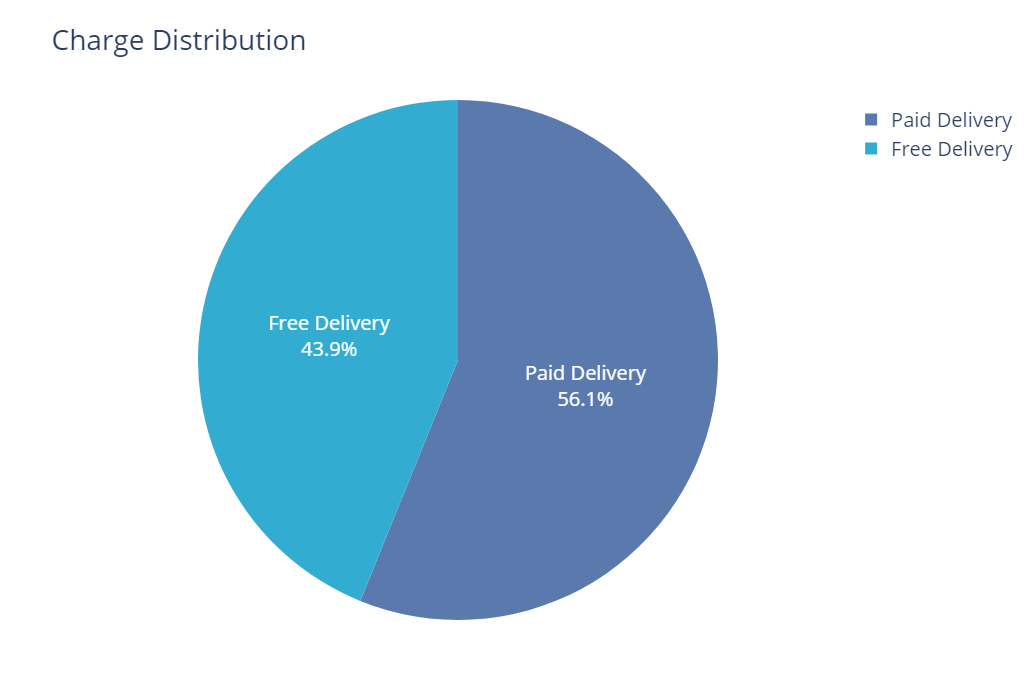

In [56]:
trace1 = go.Pie(
    values = values,
    labels = labels,
    textinfo='label+percent',
    name = "Delivery Charge",
    opacity=0.8,
    marker_colors = ['#0099C6','#325A9B'])

data = [trace1]
layout = go.Layout(title="Charge Distribution",
                   #xaxis= dict(title= 'MA Code',ticklen= 5,zeroline= False), 
                   #yaxis= dict(title= 'Amount',ticklen= 5,zeroline= False),
                   width=700,height=700,font_size=20)
fig = go.Figure(data = data, layout = layout)
fig.show()
#Not used

In [57]:
DELIVERY_customer_segment_df = delivery_clean_df.groupby(['CUSTOMER_SEGMENT']).count()
DELIVERY_customer_segment_df.head(8)

MA  PROD_CD   BRAND  PLU_RETAIL_PRICE  ORDER_STORE  \
CUSTOMER_SEGMENT                                                           
0.00              316007   316007  316007            316007       316007   
1.00              405433   405433  405433            405433       405433   
2.00              351789   351789  351789            351789       351789   
3.00              378322   378322  378322            378322       378322   
4.00              521827   521827  521827            521827       521827   
5.00              627733   627733  627733            627733       627733   
6.00              375851   375851  375851            375851       375851   
7.00              792130   792130  792130            792130       792130   

                  ORDER_DATE  DELIVERY_DATE  OUTCODE     DLC  SRV_TYPS  ...  \
CUSTOMER_SEGMENT                                                        ...   
0.00                  316007         316007   316007  316007    316007  ...   
1.00                  405433         405433   405433  405433    405433  ...   
2.00                  351789         351789   351789  351789    351789  ...   
3.00                  378322         378322   378322  378322    378322  ...   
4.00                  521827         521827   521827  521827    521827  ...   
5.00                  627733         627733   627733  627733    627733  ...   
6.00                  375851         375851   375851  375851    375851  ...   
7.00                  792130         792130   792130  792130    792130  ...   

                  BAND_FIFTY  BOX_TYPE  LEAD_TIME  DELIVERY_WEEK  \
CUSTOMER_SEGMENT                                                   
0.00                  316007    316007     316007         316007   
1.00                  405433    405433     405433         405433   
2.00                  351789    351789     351789         351789   
3.00                  378322    378322     378322         378322   
4.00                  521827    521827     521827         521827   
5.00                  627733    627733     627733         627733   
6.00                  375851    375851     375851         375851   
7.00                  792130    792130     792130         792130   

                  DELIVERY_WEEKDAY_WEEKEND    WEEE    AREA  D_OR_Q  \
CUSTOMER_SEGMENT                                                     
0.00                                316007  316007  316007  316007   
1.00                                405433  405433  405433  405433   
2.00                                351789  351789  351789  351789   
3.00                                378322  378322  378322  378322   
4.00                                521827  521827  521827  521827   
5.00                                627733  627733  627733  627733   
6.00                                375851  375851  375851  375851   
7.00                                792130  792130  792130  792130   

                  Installation  MA_CLEAN  
CUSTOMER_SEGMENT                          
0.00                    316007    316007  
1.00                    405433    405433  
2.00                    351789    351789  
3.00                    378322    378322  
4.00                    521827    521827  
5.00                    627733    627733  
6.00                    375851    375851  
7.00                    792130    792130  

[8 rows x 22 columns]

# Cross Sectional Research

### D versus Q

In [4]:
D_df = delivery_clean_df[delivery_clean_df['D_OR_Q']=='D']
Q_df = delivery_clean_df[delivery_clean_df['D_OR_Q']=='Q']

In [5]:
length_D = len(D_df)
length_Q = len(Q_df)

In [8]:
D_df.loc[(D_df['LEAD_TIME']>10), 'PROD_CD'].count()/length_D
Q_df.loc[(Q_df['LEAD_TIME']>10), 'PROD_CD'].count()/length_Q

0.14993437495285558

In [60]:
D_df.loc[(D_df['DELIVERY_CHARGE']==0)&(D_df['WEEE']==1),'PROD_CD'].count()

24332

[1565113, 1806265]


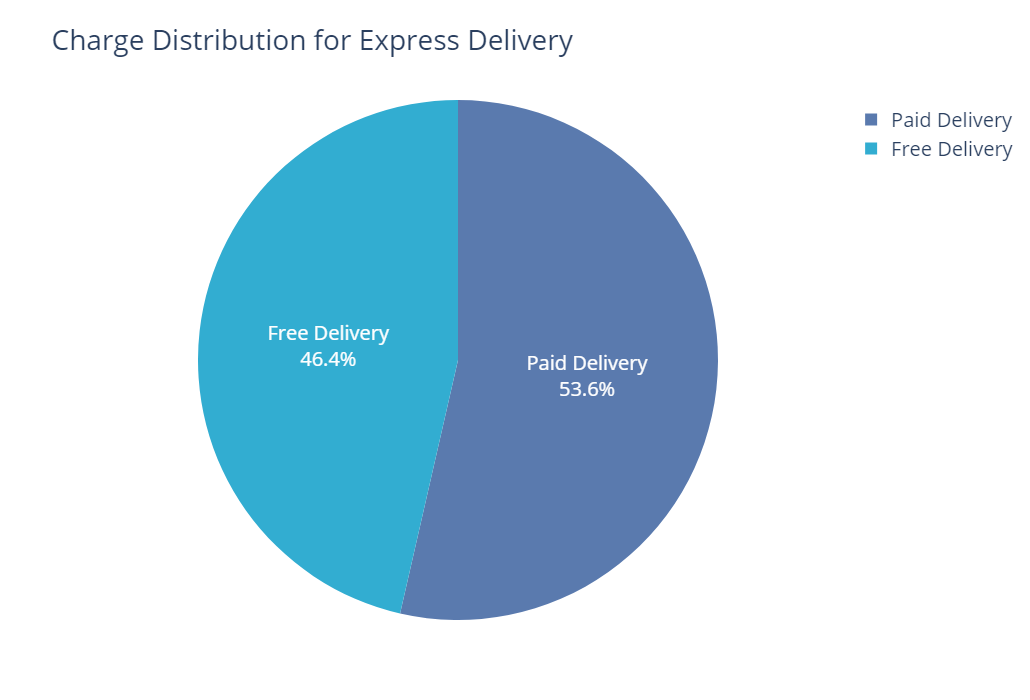

In [61]:
DELIVERY_CHARGE_D_df = D_df.groupby(['DELIVERY_CHARGE']).count()
values=[]
labels=[]
values.append(D_df.loc[D_df['DELIVERY_CHARGE']==0,'PROD_CD'].count())
values.append(D_df.loc[D_df['DELIVERY_CHARGE']>0,'PROD_CD'].count())
labels=['Free Delivery','Paid Delivery']
print(values)

trace1 = go.Pie(
    values = values,
    labels = labels,
    textinfo='label+percent',
    opacity=0.8,
    marker_colors = ['#0099C6','#325A9B'],
    name = "Delivery Charge")

data = [trace1]
layout = go.Layout(title="Charge Distribution for Express Delivery",
                   width=700,height=700,font_size=20)
fig = go.Figure(data = data, layout = layout)
fig.show()
#This is Figure 12 in the dissertation

In [62]:
print(D_df.loc[(D_df['WEEE']==1)&(D_df['DELIVERY_CHARGE']>=35)&(D_df['BOX_TYPE']=='BIG BOX'),'PROD_CD'].count())
print(D_df['PROD_CD'].count())

520927
3371378


[88111, 309603]


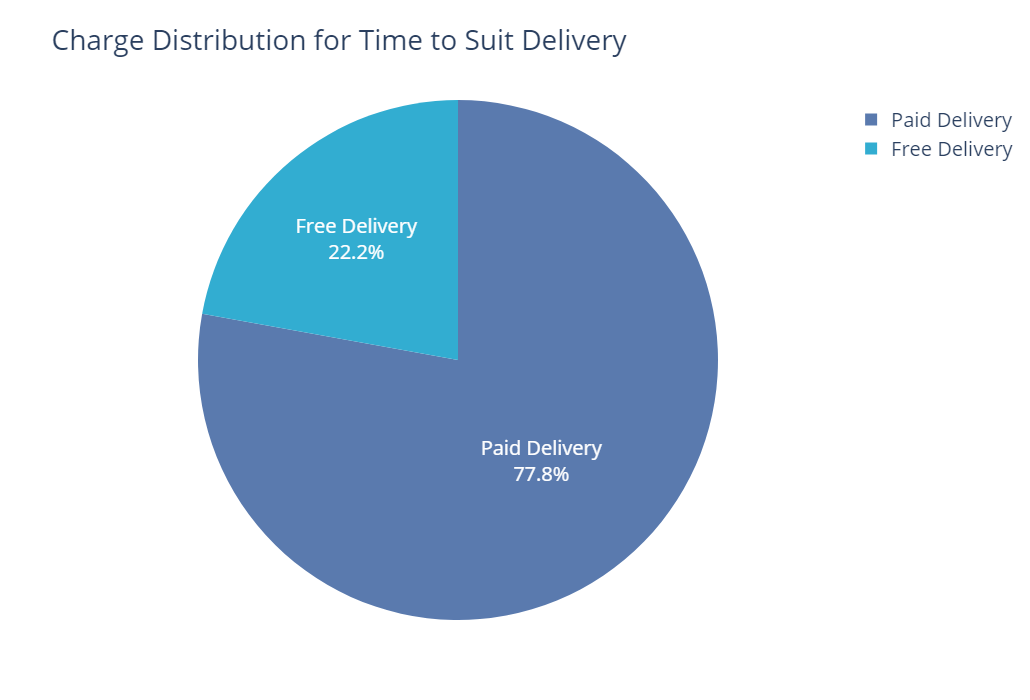

In [63]:
DELIVERY_CHARGE_Q_df = Q_df.groupby(['DELIVERY_CHARGE']).count()
values=[]
labels=[]
values.append(Q_df.loc[Q_df['DELIVERY_CHARGE']==0,'PROD_CD'].count())
values.append(Q_df.loc[Q_df['DELIVERY_CHARGE']>0,'PROD_CD'].count())
labels=['Free Delivery','Paid Delivery']
print(values)

trace1 = go.Pie(
    values = values,
    labels = labels,
    textinfo='label+percent',
    opacity=0.8,
    marker_colors = ['#0099C6','#325A9B'],
    name = "Delivery Charge")

data = [trace1]
layout = go.Layout(title="Charge Distribution for Time to Suit Delivery",
                   width=700,height=700,font_size=20)
fig = go.Figure(data = data, layout = layout)
fig.show()
#This is Figure 12 in the dissertation

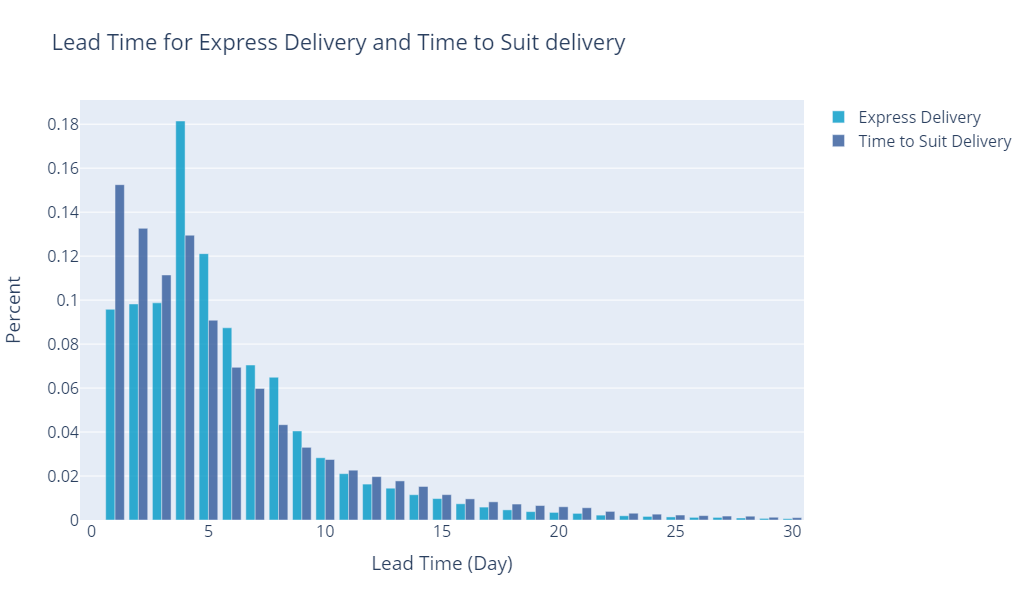

In [64]:
DELIVERY_LEADTIME_D_df = D_df.groupby(['LEAD_TIME']).count()
DELIVERY_LEADTIME_D_df = pd.DataFrame(DELIVERY_LEADTIME_D_df)

DELIVERY_LEADTIME_Q_df = Q_df.groupby(['LEAD_TIME']).count()
DELIVERY_LEADTIME_Q_df = pd.DataFrame(DELIVERY_LEADTIME_Q_df)

trace1 = go.Bar(
    x = DELIVERY_LEADTIME_D_df.index.values,
    y = DELIVERY_LEADTIME_D_df['PROD_CD']/length_D,
    name = "Express Delivery",
    opacity=0.8,
    marker_color = '#0099C6',
    #textposition='outside',
    text = DELIVERY_LEADTIME_D_df.index.values)

trace2 = go.Bar(
    x = DELIVERY_LEADTIME_Q_df.index.values,
    y = DELIVERY_LEADTIME_Q_df['PROD_CD']/length_Q,
    name = "Time to Suit Delivery",
    opacity=0.8,
    marker_color='#325A9B',
    text = DELIVERY_LEADTIME_Q_df.index.values)

data = [trace1,trace2]
layout = go.Layout(barmode = "group", title="Lead Time for Express Delivery and Time to Suit delivery",
                                      xaxis= dict(title= 'Lead Time (Day)',ticklen= 5,zeroline= False), 
                   yaxis= dict(title= 'Percent',ticklen= 5,zeroline= False),width=1200,height=600,font_size=16)
fig = go.Figure(data = data, layout = layout)
fig.show()
#This is Figure 13 in the dissertation

In [65]:
pd.set_option('display.float_format',lambda x : '%.2f' % x)
D_paid_df=D_df[D_df['DELIVERY_CHARGE']>0]
D_paid_df.describe()

PROD_CD  PLU_RETAIL_PRICE  ORDER_STORE        DLC  DELIVERY_CHARGE  \
count 1806265.00        1806265.00   1806265.00 1806265.00       1806265.00   
mean   243390.45            365.68      3547.20   74343.65            33.30   
std    133170.99            279.12      1298.74     147.81            25.32   
min       629.00             22.99        13.00   74110.00             0.00   
25%    179417.00            219.99      2313.00   74230.00            15.00   
50%    225448.00            299.00      2855.00   74290.00            25.00   
75%    245005.00            399.00      4944.00   74470.00            45.00   
max    999279.00          14999.00      7017.00   74660.00           120.00   

       CUSTOMER_SEGMENT     VOLUME  BAND_FIFTY  LEAD_TIME  DELIVERY_WEEK  \
count        1806265.00 1806265.00  1806265.00 1806265.00     1806265.00   
mean               4.15       1.00      831.97       5.30           3.06   
std                2.32       0.00    10669.21       4.29           2.05   
min                0.00       1.00       50.00       0.00           0.00   
25%                2.00       1.00      250.00       2.00           1.00   
50%                4.00       1.00      300.00       4.00           3.00   
75%                6.00       1.00      400.00       7.00           5.00   
max                7.00       1.00   250000.00      30.00           6.00   

       DELIVERY_WEEKDAY_WEEKEND       WEEE  Installation  
count                1806265.00 1806265.00    1806265.00  
mean                       0.68       0.54          0.38  
std                        0.47       0.50          0.49  
min                        0.00       0.00          0.00  
25%                        0.00       0.00          0.00  
50%                        1.00       1.00          0.00  
75%                        1.00       1.00          1.00  
max                        1.00       1.00          1.00

In [66]:
pd.set_option('display.float_format',lambda x : '%.2f' % x)
Q_paid_df=Q_df[Q_df['DELIVERY_CHARGE']>0]
Q_paid_df.describe()

PROD_CD  PLU_RETAIL_PRICE  ORDER_STORE       DLC  DELIVERY_CHARGE  \
count 309603.00         309603.00    309603.00 309603.00        309603.00   
mean  251167.47            401.34      3494.48  74338.80            44.08   
std   138930.79            360.08      1309.89    146.67            26.26   
min      629.00             12.97        13.00  74110.00             0.00   
25%   182246.00            219.99      2313.00  74230.00            20.00   
50%   229100.00            299.99      2828.00  74290.00            40.00   
75%   247106.00            429.00      4944.00  74470.00            65.00   
max   999279.00           9499.00      7014.00  74660.00           120.00   

       CUSTOMER_SEGMENT    VOLUME  BAND_FIFTY  LEAD_TIME  DELIVERY_WEEK  \
count         309603.00 309603.00   309603.00  309603.00      309603.00   
mean               4.14      1.00     1450.76       5.32           3.16   
std                2.28      0.00    16136.16       4.55           2.01   
min                0.00      1.00       50.00       1.00           0.00   
25%                2.00      1.00      250.00       2.00           1.00   
50%                4.00      1.00      300.00       4.00           3.00   
75%                6.00      1.00      450.00       7.00           5.00   
max                7.00      1.00   250000.00      30.00           6.00   

       DELIVERY_WEEKDAY_WEEKEND      WEEE  Installation  
count                 309603.00 309603.00     309603.00  
mean                       0.71      0.46          0.34  
std                        0.46      0.50          0.47  
min                        0.00      0.00          0.00  
25%                        0.00      0.00          0.00  
50%                        1.00      0.00          0.00  
75%                        1.00      1.00          1.00  
max                        1.00      1.00          1.00

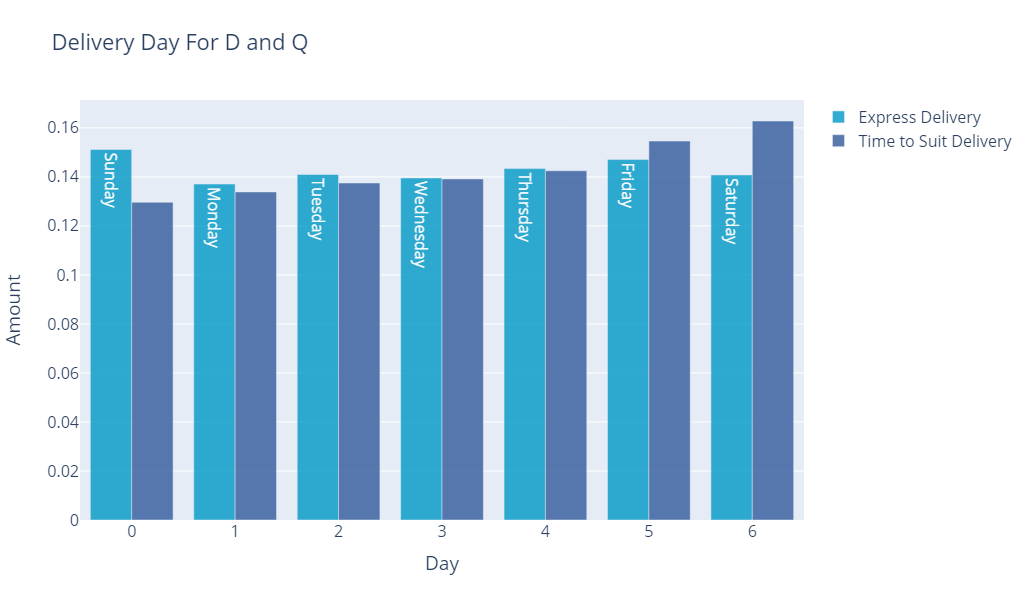

In [67]:
DELIVERY_WEEK_D_df = D_df.groupby(['DELIVERY_WEEK']).count()

DELIVERY_WEEK_D_df = pd.DataFrame(DELIVERY_WEEK_D_df)

DELIVERY_WEEK_Q_df = Q_df.groupby(['DELIVERY_WEEK']).count()

DELIVERY_WEEK_Q_df = pd.DataFrame(DELIVERY_WEEK_Q_df)

trace1 = go.Bar(
    x = DELIVERY_WEEK_D_df.index.values,
    y = DELIVERY_WEEK_D_df['PROD_CD']/length_D,
    name = "Express Delivery",
    opacity=0.8,
    marker_color = '#0099C6',
    textposition='auto',
    text = ['Sunday', 'Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'])

trace2 = go.Bar(
    x = DELIVERY_WEEK_Q_df.index.values,
    y = DELIVERY_WEEK_Q_df['PROD_CD']/length_Q,
    name = "Time to Suit Delivery",
    opacity=0.8,
    marker_color='#325A9B')
    #textposition='outside'
    #text = ['Sunday', 'Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'])
data = [trace1,trace2]

layout = go.Layout(barmode = "group", title="Delivery Day For D and Q",
                   xaxis= dict(title= 'Day',ticklen= 5,zeroline= False), 
                   yaxis= dict(title= 'Amount',ticklen= 5,zeroline= False),width=1200,height=600,font_size=16)
fig = go.Figure(data = data, layout = layout)
fig.show()
#This is Figure 13 in the dissertation

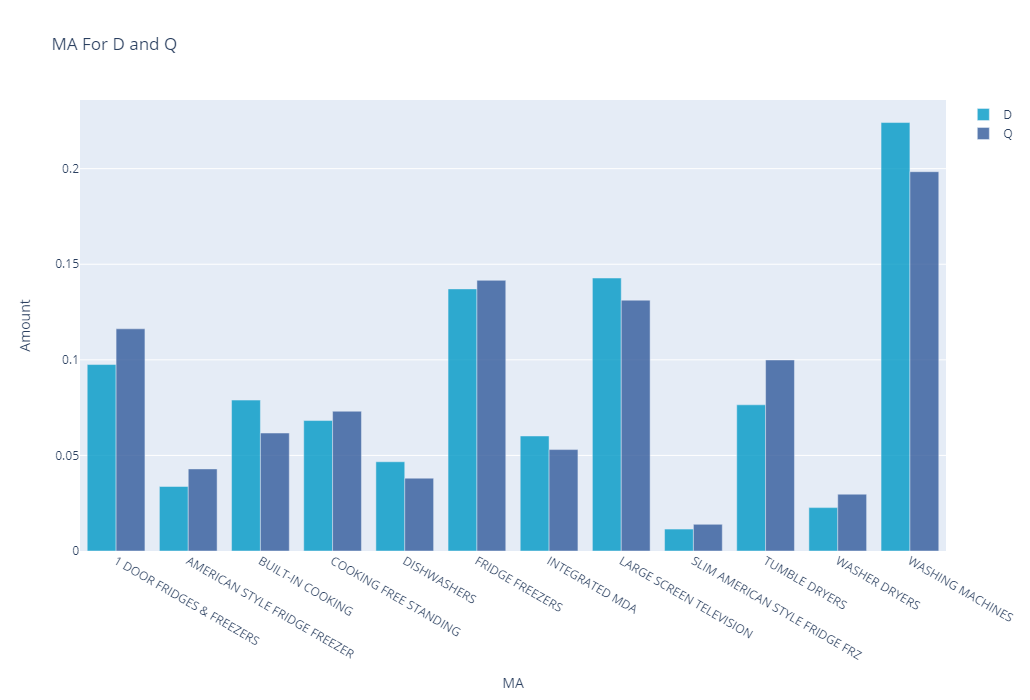

In [99]:
D_group_df = D_df.groupby(['MA']).count()

D_group_df = pd.DataFrame(D_group_df)


trace1 = go.Bar(
    x = D_group_df.index.values,
    y = D_group_df['PROD_CD']/length_D,
    name = "D",
    opacity=0.8,
    #textposition='auto',
    marker_color = '#0099C6',
    text = D_group_df.index.values)

Q_group_df = Q_df.groupby(['MA']).count()

Q_group_df = pd.DataFrame(Q_group_df)


trace2 = go.Bar(
    x = Q_group_df.index.values,
    y = Q_group_df['PROD_CD']/length_Q,
    name = "Q",
    marker_color='#325A9B',
    opacity=0.8,
    text = Q_group_df.index.values)

data = [trace1,trace2]

layout = go.Layout(barmode = "group", title="MA For D and Q",
                   xaxis= dict(title= 'MA',ticklen= 5,zeroline= False), 
                   yaxis= dict(title= 'Amount',ticklen= 5,zeroline= False),
                   width=1100,height=700)
fig = go.Figure(data = data, layout = layout)
fig.show()

### DCG segmentation

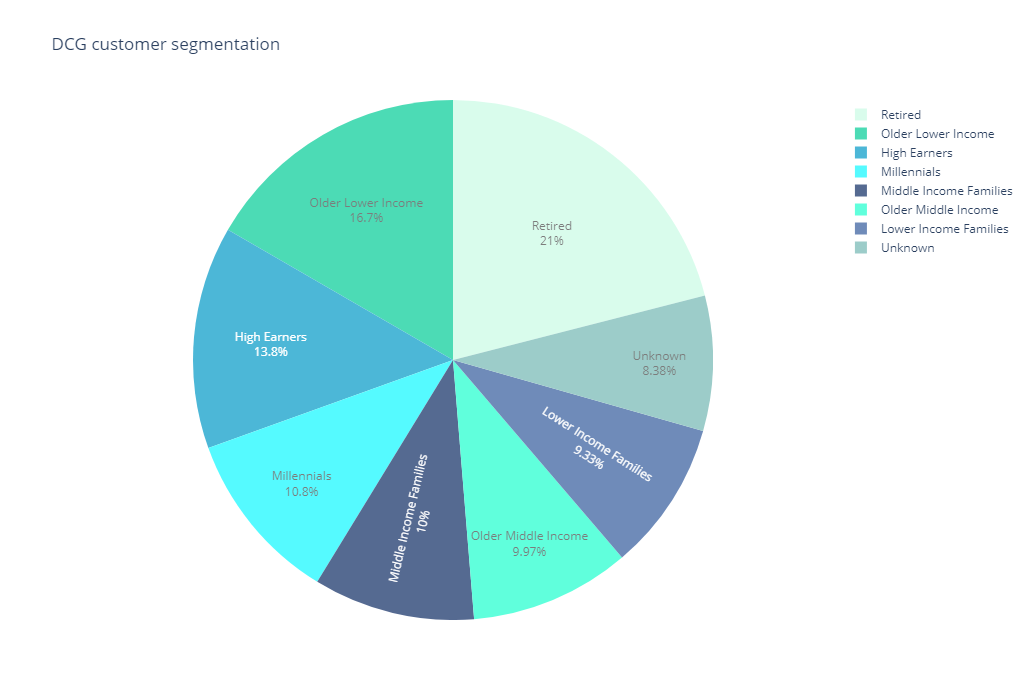

In [7]:
dcg_df =delivery_clean_df.groupby(['CUSTOMER_SEGMENT']).count()
dcg_df = dcg_df.sort_index()
values=dcg_df['PROD_CD']
#labels=['Unknown','Millennials','Lower Income Families','Middle Income Falmilies','High Earners','Older Lower Income','Older Middle Income','Retired']
labels = dcg_df.index.values

trace1 = go.Pie(
    values = values,
    labels = labels,
    textinfo='label+percent',
    opacity=0.7,
    marker_colors = ['#0099C6','#325A9B','#0D2A63','#0DF9FF','#00CC96','#1CFFCE','#C9FBE5','#72B7B2'],
    name = "DCG customer segmentation")

data = [trace1]
layout = go.Layout(title="DCG customer segmentation",
                   width=700,height=700,font_size=12)
fig = go.Figure(data = data, layout = layout)
fig.show()
#This is Figure 14 in the dissertation

[181397, 181804, 9130, 33102]


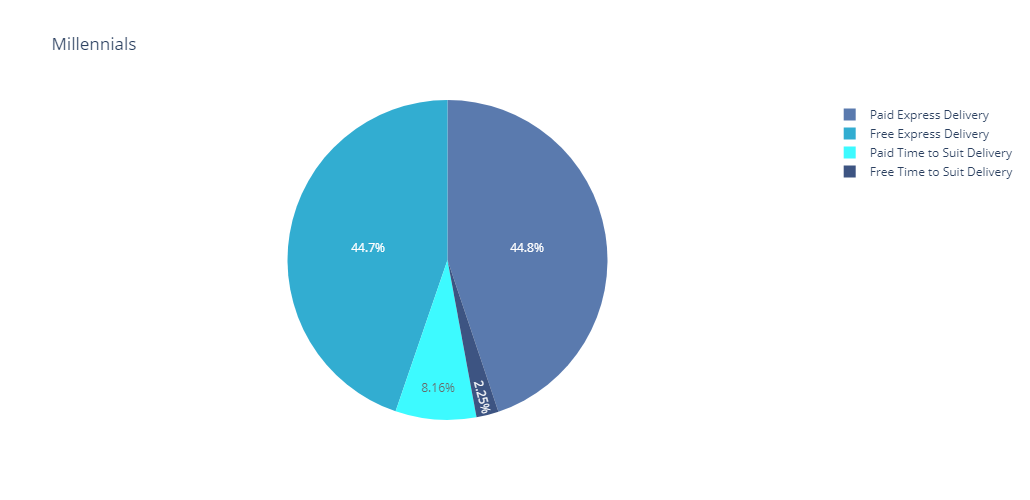

In [9]:
mill_dcg_df = delivery_clean_df[delivery_clean_df['CUSTOMER_SEGMENT']=='Millennials']
values=[]
labels=[]
values.append(mill_dcg_df.loc[(mill_dcg_df['DELIVERY_CHARGE']==0)&(mill_dcg_df['D_OR_Q']=='D'),'PROD_CD'].count())
values.append(mill_dcg_df.loc[(mill_dcg_df['DELIVERY_CHARGE']>0)&(mill_dcg_df['D_OR_Q']=='D'),'PROD_CD'].count())
values.append(mill_dcg_df.loc[(mill_dcg_df['DELIVERY_CHARGE']==0)&(mill_dcg_df['D_OR_Q']=='Q'),'PROD_CD'].count())
values.append(mill_dcg_df.loc[(mill_dcg_df['DELIVERY_CHARGE']>0)&(mill_dcg_df['D_OR_Q']=='Q'),'PROD_CD'].count())

labels=['Free Express Delivery','Paid Express Delivery', 'Free Time to Suit Delivery', 'Paid Time to Suit Delivery']
print(values)

trace1 = go.Pie(
    values = values,
    labels = labels,
    textinfo='percent',
    marker_colors = ['#0099C6','#325A9B','#0D2A63','#0DF9FF'],
    opacity = 0.8,
    name = "Delivery Charge")

data = [trace1]
layout = go.Layout(title="Millennials",
                   width=500,height=500)
fig = go.Figure(data = data, layout = layout)
fig.show()
#This is Figure 14 in the dissertation

[161497, 157950, 8987, 23355]


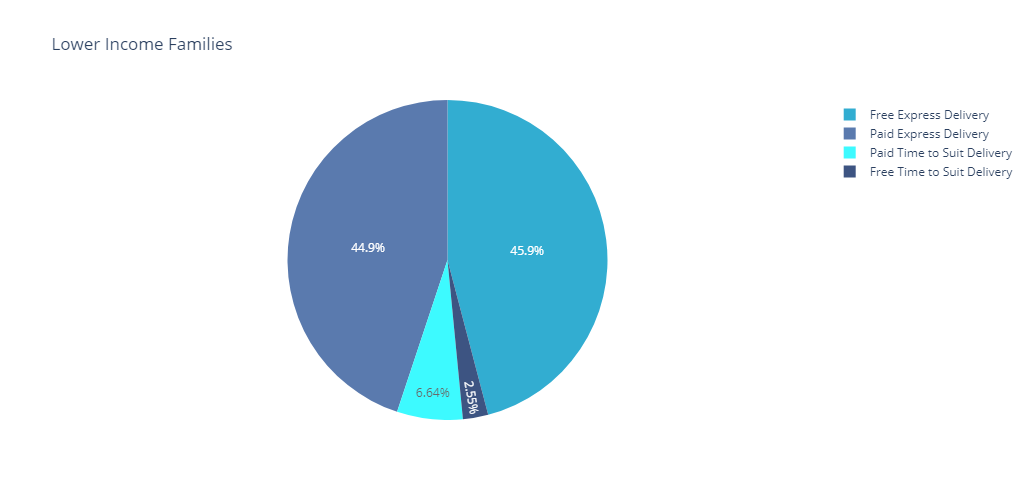

In [10]:
lower_dcg_df = delivery_clean_df[delivery_clean_df['CUSTOMER_SEGMENT']=='Lower Income Families']
values=[]
labels=[]
values.append(lower_dcg_df.loc[(lower_dcg_df['DELIVERY_CHARGE']==0)&(lower_dcg_df['D_OR_Q']=='D'),'PROD_CD'].count())
values.append(lower_dcg_df.loc[(lower_dcg_df['DELIVERY_CHARGE']>0)&(lower_dcg_df['D_OR_Q']=='D'),'PROD_CD'].count())
values.append(lower_dcg_df.loc[(lower_dcg_df['DELIVERY_CHARGE']==0)&(lower_dcg_df['D_OR_Q']=='Q'),'PROD_CD'].count())
values.append(lower_dcg_df.loc[(lower_dcg_df['DELIVERY_CHARGE']>0)&(lower_dcg_df['D_OR_Q']=='Q'),'PROD_CD'].count())

labels=['Free Express Delivery','Paid Express Delivery', 'Free Time to Suit Delivery', 'Paid Time to Suit Delivery']
print(values)

trace1 = go.Pie(
    values = values,
    labels = labels,
    textinfo='percent',
    marker_colors = ['#0099C6','#325A9B','#0D2A63','#0DF9FF'],
    opacity = 0.8,
    name = "Delivery Charge")

data = [trace1]
layout = go.Layout(title="Lower Income Families",
                   width=500,height=500)
fig = go.Figure(data = data, layout = layout)
fig.show()
#This is Figure 14 in the dissertation

[171042, 170582, 9398, 27300]


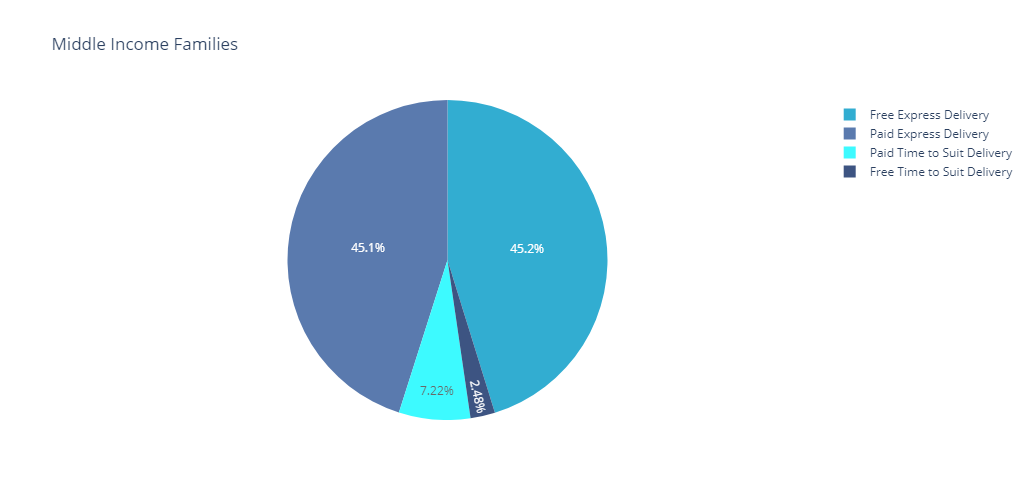

In [11]:
middle_dcg_df = delivery_clean_df[delivery_clean_df['CUSTOMER_SEGMENT']=='Middle Income Families']
values=[]
labels=[]
values.append(middle_dcg_df.loc[(middle_dcg_df['DELIVERY_CHARGE']==0)&(middle_dcg_df['D_OR_Q']=='D'),'PROD_CD'].count())
values.append(middle_dcg_df.loc[(middle_dcg_df['DELIVERY_CHARGE']>0)&(middle_dcg_df['D_OR_Q']=='D'),'PROD_CD'].count())
values.append(middle_dcg_df.loc[(middle_dcg_df['DELIVERY_CHARGE']==0)&(middle_dcg_df['D_OR_Q']=='Q'),'PROD_CD'].count())
values.append(middle_dcg_df.loc[(middle_dcg_df['DELIVERY_CHARGE']>0)&(middle_dcg_df['D_OR_Q']=='Q'),'PROD_CD'].count())

labels=['Free Express Delivery','Paid Express Delivery', 'Free Time to Suit Delivery', 'Paid Time to Suit Delivery']
print(values)

trace1 = go.Pie(
    values = values,
    labels = labels,
    textinfo='percent',
    marker_colors = ['#0099C6','#325A9B','#0D2A63','#0DF9FF'],
    opacity = 0.8,
    name = "Delivery Charge")

data = [trace1]
layout = go.Layout(title="Middle Income Families",
                   width=500,height=500)
fig = go.Figure(data = data, layout = layout)
fig.show()
#This is Figure 14 in the dissertation

[219329, 241229, 12089, 49180]


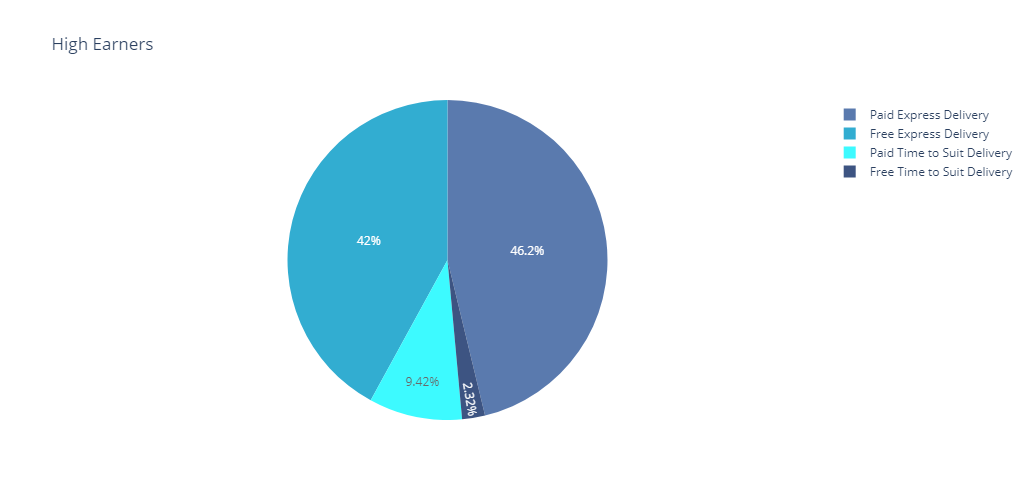

In [12]:
high_dcg_df = delivery_clean_df[delivery_clean_df['CUSTOMER_SEGMENT']=='High Earners']
values=[]
labels=[]
values.append(high_dcg_df.loc[(high_dcg_df['DELIVERY_CHARGE']==0)&(high_dcg_df['D_OR_Q']=='D'),'PROD_CD'].count())
values.append(high_dcg_df.loc[(high_dcg_df['DELIVERY_CHARGE']>0)&(high_dcg_df['D_OR_Q']=='D'),'PROD_CD'].count())
values.append(high_dcg_df.loc[(high_dcg_df['DELIVERY_CHARGE']==0)&(high_dcg_df['D_OR_Q']=='Q'),'PROD_CD'].count())
values.append(high_dcg_df.loc[(high_dcg_df['DELIVERY_CHARGE']>0)&(high_dcg_df['D_OR_Q']=='Q'),'PROD_CD'].count())


labels=['Free Express Delivery','Paid Express Delivery', 'Free Time to Suit Delivery', 'Paid Time to Suit Delivery']
print(values)

trace1 = go.Pie(
    values = values,
    labels = labels,
    textinfo='percent',
    marker_colors = ['#0099C6','#325A9B','#0D2A63','#0DF9FF'],
    opacity = 0.8,
    name = "Delivery Charge")

data = [trace1]
layout = go.Layout(title="High Earners",
                   width=500,height=500)
fig = go.Figure(data = data, layout = layout)
fig.show()
#This is Figure 14 in the dissertation

[260278, 300060, 15543, 51852]


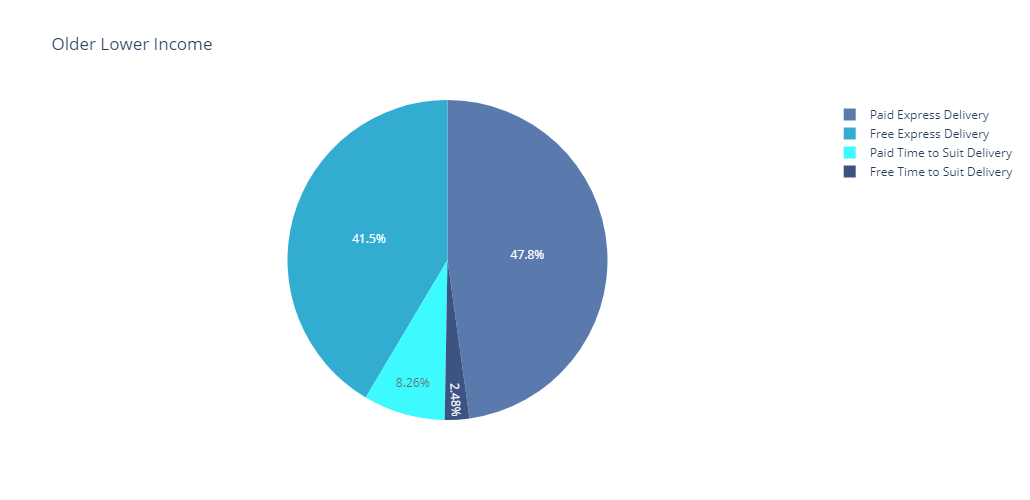

In [13]:
older_low_dcg_df = delivery_clean_df[delivery_clean_df['CUSTOMER_SEGMENT']=='Older Lower Income']
values=[]
labels=[]
values.append(older_low_dcg_df.loc[(older_low_dcg_df['DELIVERY_CHARGE']==0)&(older_low_dcg_df['D_OR_Q']=='D'),'PROD_CD'].count())
values.append(older_low_dcg_df.loc[(older_low_dcg_df['DELIVERY_CHARGE']>0)&(older_low_dcg_df['D_OR_Q']=='D'),'PROD_CD'].count())
values.append(older_low_dcg_df.loc[(older_low_dcg_df['DELIVERY_CHARGE']==0)&(older_low_dcg_df['D_OR_Q']=='Q'),'PROD_CD'].count())
values.append(older_low_dcg_df.loc[(older_low_dcg_df['DELIVERY_CHARGE']>0)&(older_low_dcg_df['D_OR_Q']=='Q'),'PROD_CD'].count())

labels=['Free Express Delivery','Paid Express Delivery', 'Free Time to Suit Delivery', 'Paid Time to Suit Delivery']
print(values)

trace1 = go.Pie(
    values = values,
    labels = labels,
    textinfo='percent',
    marker_colors = ['#0099C6','#325A9B','#0D2A63','#0DF9FF'],
    opacity = 0.8,
    name = "Delivery Charge")

data = [trace1]
layout = go.Layout(title="Older Lower Income",
                   width=500,height=500)
fig = go.Figure(data = data, layout = layout)
fig.show()
#This is Figure 14 in the dissertation

[260278, 300060, 15543, 51852]


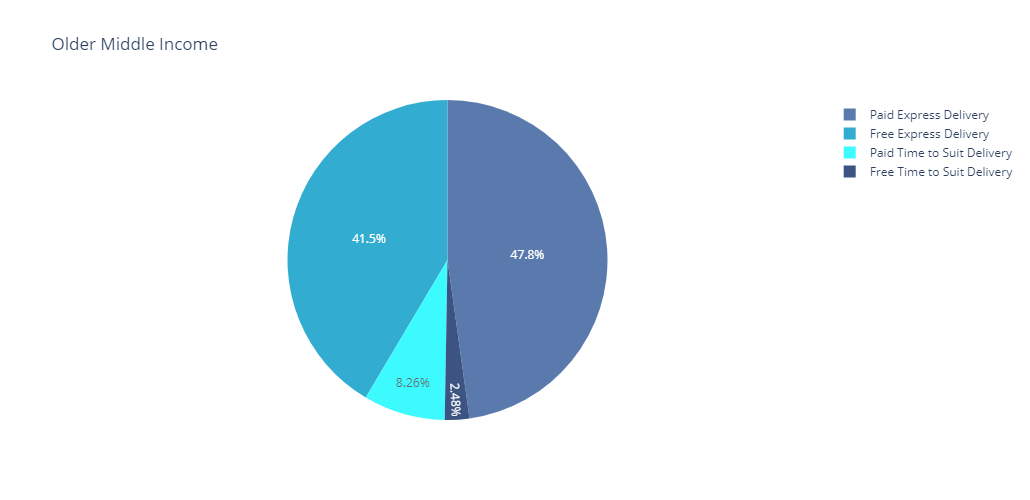

In [14]:
older_middle_dcg_df = delivery_clean_df[delivery_clean_df['CUSTOMER_SEGMENT']=='Older Middle Income']
values=[]
labels=[]
values.append(older_low_dcg_df.loc[(older_low_dcg_df['DELIVERY_CHARGE']==0)&(older_low_dcg_df['D_OR_Q']=='D'),'PROD_CD'].count())
values.append(older_low_dcg_df.loc[(older_low_dcg_df['DELIVERY_CHARGE']>0)&(older_low_dcg_df['D_OR_Q']=='D'),'PROD_CD'].count())
values.append(older_low_dcg_df.loc[(older_low_dcg_df['DELIVERY_CHARGE']==0)&(older_low_dcg_df['D_OR_Q']=='Q'),'PROD_CD'].count())
values.append(older_low_dcg_df.loc[(older_low_dcg_df['DELIVERY_CHARGE']>0)&(older_low_dcg_df['D_OR_Q']=='Q'),'PROD_CD'].count())

labels=['Free Express Delivery','Paid Express Delivery', 'Free Time to Suit Delivery', 'Paid Time to Suit Delivery']
print(values)

trace1 = go.Pie(
    values = values,
    labels = labels,
    textinfo='percent',
    marker_colors = ['#0099C6','#325A9B','#0D2A63','#0DF9FF'],
    opacity = 0.8,
    name = "Delivery Charge")

data = [trace1]
layout = go.Layout(title="Older Middle Income",
                   width=500,height=500)
fig = go.Figure(data = data, layout = layout)
fig.show()
#This is Figure 14 in the dissertation

[281474, 425274, 17324, 68058]


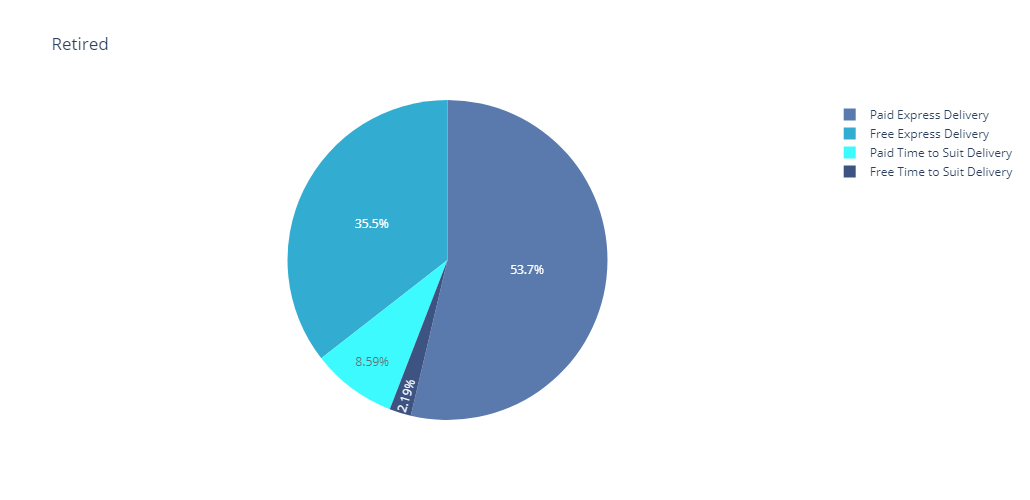

In [6]:
retired_dcg_df = delivery_clean_df[delivery_clean_df['CUSTOMER_SEGMENT']=='Retired']
values=[]
labels=[]
values.append(retired_dcg_df.loc[(retired_dcg_df['DELIVERY_CHARGE']==0)&(retired_dcg_df['D_OR_Q']=='D'),'PROD_CD'].count())
values.append(retired_dcg_df.loc[(retired_dcg_df['DELIVERY_CHARGE']>0)&(retired_dcg_df['D_OR_Q']=='D'),'PROD_CD'].count())
values.append(retired_dcg_df.loc[(retired_dcg_df['DELIVERY_CHARGE']==0)&(retired_dcg_df['D_OR_Q']=='Q'),'PROD_CD'].count())
values.append(retired_dcg_df.loc[(retired_dcg_df['DELIVERY_CHARGE']>0)&(retired_dcg_df['D_OR_Q']=='Q'),'PROD_CD'].count())

labels=['Free Express Delivery','Paid Express Delivery', 'Free Time to Suit Delivery', 'Paid Time to Suit Delivery']
print(values)

trace1 = go.Pie(
    values = values,
    labels = labels,
    textinfo='percent',
    marker_colors = ['#0099C6','#325A9B','#0D2A63','#0DF9FF'],
    opacity = 0.8,
    name = "Delivery Charge")

data = [trace1]
layout = go.Layout(title="Retired",
                   width=500,height=500)
fig = go.Figure(data = data, layout = layout)
fig.show()
#This is Figure 14 in the dissertation

### WEEE

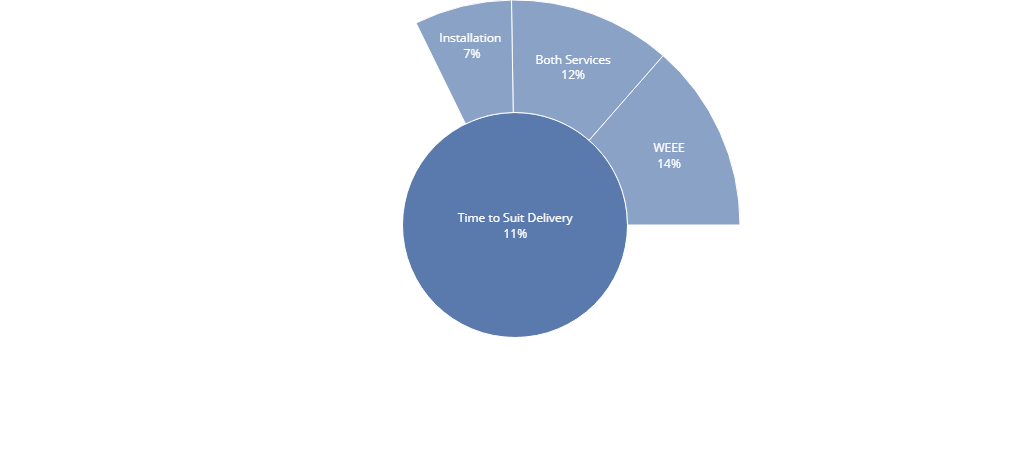

[3371378, 397714, 561021, 278075, 437211, 79618, 41097, 68591]


In [14]:
values = []
values.append(len(D_df))
values.append(len(Q_df))
values.append(D_df.loc[(D_df['WEEE']==1)&(D_df['Installation']==0),'PROD_CD'].count())
values.append(D_df.loc[(D_df['WEEE']==0)&(D_df['Installation']==1),'PROD_CD'].count())
values.append(D_df.loc[(D_df['WEEE']==1)&(D_df['Installation']==1),'PROD_CD'].count())
values.append(Q_df.loc[(Q_df['WEEE']==1)&(Q_df['Installation']==0),'PROD_CD'].count())
values.append(Q_df.loc[(Q_df['WEEE']==0)&(Q_df['Installation']==1),'PROD_CD'].count())
values.append(Q_df.loc[(Q_df['WEEE']==1)&(Q_df['Installation']==1),'PROD_CD'].count())

fig =go.Figure(go.Sunburst(
    labels=["Express Delivery", "Time to Suit Delivery", "WEEE", "Installation","Both Services", "WEEE", "Installation ","Both Services"],
    parents=["", "", "Express Delivery", "Express Delivery", "Express Delivery", "Time to Suit Delivery", "Time to Suit Delivery","Time to Suit Delivery"],
    values=values,textinfo = 'label+percent parent',
    marker_colors = ['#0099C6','#325A9B'],
    opacity = 0.8
))
# Update layout for tight margin
# See https://plotly.com/python/creating-and-updating-figures/
fig.update_layout(margin = dict(t=0, l=0, r=0, b=0))

fig.show()
print(values)
#This is Figure 10 in the dissertation

[24332, 973900, 4358, 143851]


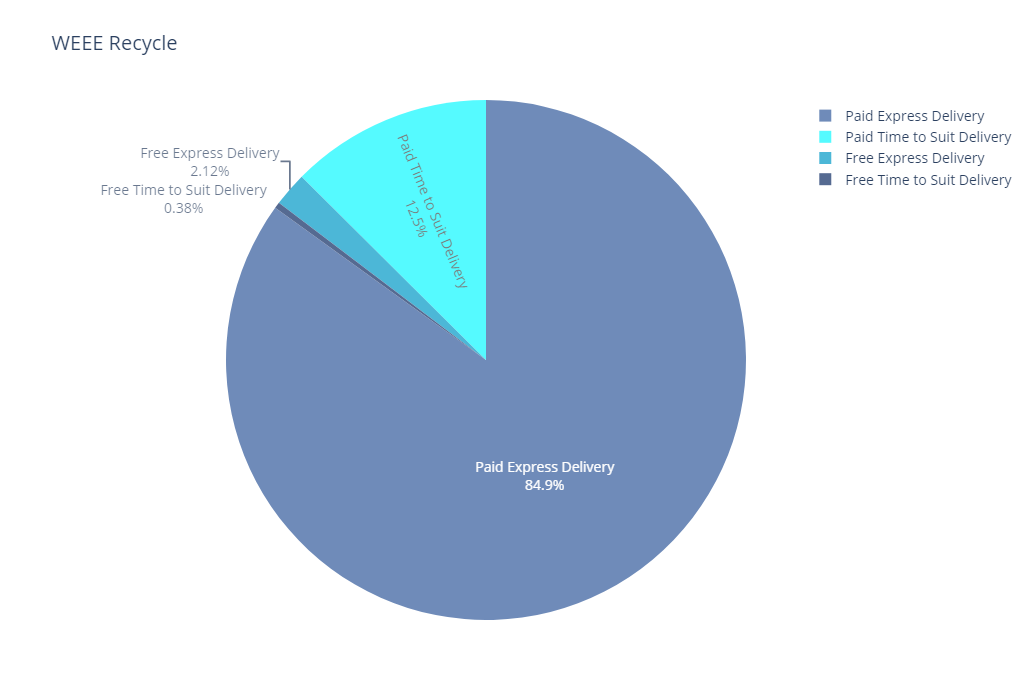

In [74]:
weee_df = delivery_clean_df[delivery_clean_df['WEEE']==1]
values=[]
labels=[]
values.append(weee_df.loc[(weee_df['DELIVERY_CHARGE']==0)&(weee_df['D_OR_Q']=='D'),'PROD_CD'].count())
values.append(weee_df.loc[(weee_df['DELIVERY_CHARGE']>0)&(weee_df['D_OR_Q']=='D'),'PROD_CD'].count())
values.append(weee_df.loc[(weee_df['DELIVERY_CHARGE']==0)&(weee_df['D_OR_Q']=='Q'),'PROD_CD'].count())
values.append(weee_df.loc[(weee_df['DELIVERY_CHARGE']>0)&(weee_df['D_OR_Q']=='Q'),'PROD_CD'].count())
labels=['Free Express Delivery','Paid Express Delivery', 'Free Time to Suit Delivery', 'Paid Time to Suit Delivery']

print(values)
trace1 = go.Pie(
    values = values,
    labels = labels,
    textinfo='label+percent',
    opacity=0.7,
    marker_colors = ['#0099C6','#325A9B','#0D2A63','#0DF9FF','#00CC96','#1CFFCE','#C9FBE5','#72B7B2'],
    name = "WEEE delivery way")

data = [trace1]
layout = go.Layout(title="WEEE Recycle",
                   width=700,height=700,font_size =14)
fig = go.Figure(data = data, layout = layout)
fig.show()
#Not used

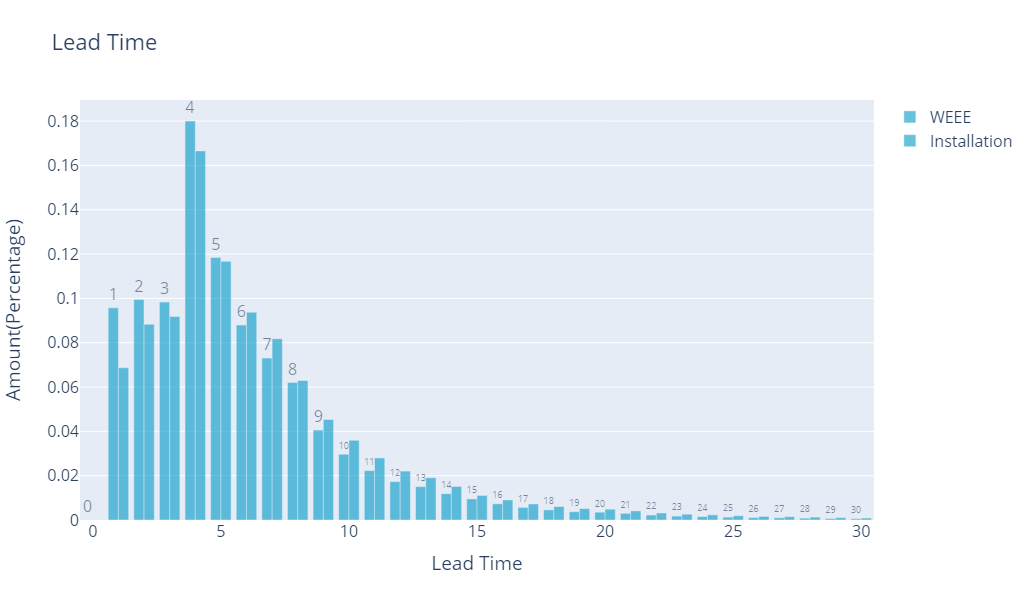

In [20]:
weee_df = delivery_clean_df[delivery_clean_df['WEEE']==1]
weee_LEADTIME_group_df = weee_df.groupby(['LEAD_TIME']).count()
weee_LEADTIME_group_df = pd.DataFrame(weee_LEADTIME_group_df)
installation_df = delivery_clean_df[delivery_clean_df['Installation']==1]
installation_LEADTIME_group_df = installation_df.groupby(['LEAD_TIME']).count()
installation_LEADTIME_group_df = pd.DataFrame(installation_LEADTIME_group_df)

trace1 = go.Bar(
    x = weee_LEADTIME_group_df.index.values,
    y = weee_LEADTIME_group_df['PROD_CD']/len(weee_df),
    name = "WEEE",
    marker_color='#0099C6',
    opacity=0.6,
    textposition='outside',
    text = weee_LEADTIME_group_df.index.values)

trace2 = go.Bar(
    x = installation_LEADTIME_group_df.index.values,
    y = installation_LEADTIME_group_df['PROD_CD']/len(installation_df),
    name = "Installation",
    marker_color='#0099C6',
    opacity=0.6)

data = [trace1,trace2]
layout = go.Layout(barmode = "group", title="Lead Time",
                                      xaxis= dict(title= 'Lead Time',ticklen= 5,zeroline= False), 
                   yaxis= dict(title= 'Amount(Percentage)',ticklen= 5,zeroline= False),
                   width=1200,height=600,font_size=16)
fig = go.Figure(data = data, layout = layout)
fig.show()
#Not used

[29176, 686110, 4695, 104993]


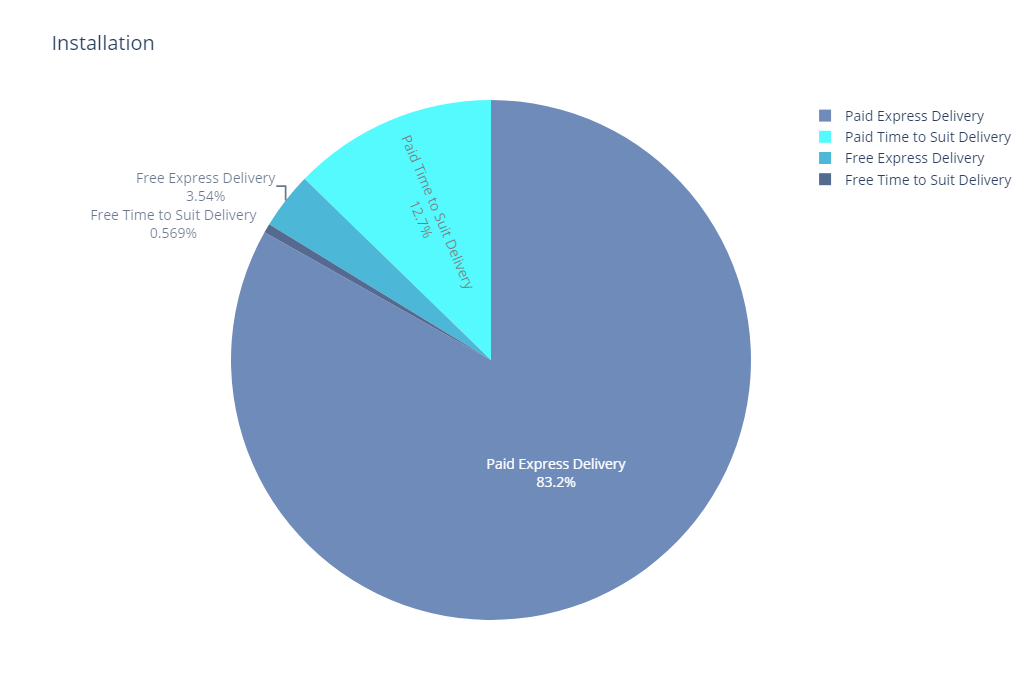

In [75]:
installation_df = delivery_clean_df[delivery_clean_df['Installation']==1]
values=[]
labels=[]
values.append(installation_df.loc[(installation_df['DELIVERY_CHARGE']==0)&(installation_df['D_OR_Q']=='D'),'PROD_CD'].count())
values.append(installation_df.loc[(installation_df['DELIVERY_CHARGE']>0)&(installation_df['D_OR_Q']=='D'),'PROD_CD'].count())
values.append(installation_df.loc[(installation_df['DELIVERY_CHARGE']==0)&(installation_df['D_OR_Q']=='Q'),'PROD_CD'].count())
values.append(installation_df.loc[(installation_df['DELIVERY_CHARGE']>0)&(installation_df['D_OR_Q']=='Q'),'PROD_CD'].count())
labels=['Free Express Delivery','Paid Express Delivery', 'Free Time to Suit Delivery', 'Paid Time to Suit Delivery']

print(values)
trace1 = go.Pie(
    values = values,
    labels = labels,
    textinfo='label+percent',
    opacity=0.7,
    marker_colors = ['#0099C6','#325A9B','#0D2A63','#0DF9FF','#00CC96','#1CFFCE','#C9FBE5','#72B7B2'],
    name = "WEEE delivery way")

data = [trace1]
layout = go.Layout(title="Installation",
                   width=700,height=700,font_size = 14)
fig = go.Figure(data = data, layout = layout)
fig.show()
#Not used

In [76]:
i = D_df.loc[D_df['DELIVERY_CHARGE']>0,'PROD_CD'].count() #D付钱了的
j = D_df.loc[(D_df['WEEE']==1)&(D_df['DELIVERY_CHARGE']>0),'PROD_CD'].count() #花钱了的D中是回收的
k = D_df.loc[((D_df['WEEE']==1)|(D_df['Installation']==1))&(D_df['DELIVERY_CHARGE']>0),'PROD_CD'].count() #花钱了的D中是回收的
print(j/i)
print(k/i)

0.5391789133931068
0.6826539848804024


In [77]:
i = D_df.loc[D_df['DELIVERY_CHARGE']>0,'PROD_CD'].count() #D付钱了的
j = D_df.loc[(D_df['Installation']==1)&(D_df['DELIVERY_CHARGE']>0),'PROD_CD'].count() #花钱了的D中是安装的

print(j/i)

0.37985013273246176


### Regional Features

In [78]:
B_df = delivery_clean_df[delivery_clean_df['AREA']=='B']
G_df = delivery_clean_df[delivery_clean_df['AREA']=='G']
BT_df = delivery_clean_df[delivery_clean_df['AREA']=='BT']
S_df = delivery_clean_df[delivery_clean_df['AREA']=='S']
KW_df = delivery_clean_df[delivery_clean_df['AREA']=='KW']
SR_df = delivery_clean_df[delivery_clean_df['AREA']=='SR']
IV_df = delivery_clean_df[delivery_clean_df['AREA']=='IV']
AB_df = delivery_clean_df[delivery_clean_df['AREA']=='AB']

In [79]:
B_length = len(B_df)
G_length = len(G_df)
BT_length = len(BT_df)
S_length = len(S_df)
print(B_length)
print(G_length)
print(BT_length)
print(S_length)

104379
81919
101888
81141


##### Birmingham

[46661, 48391, 1969, 7358]


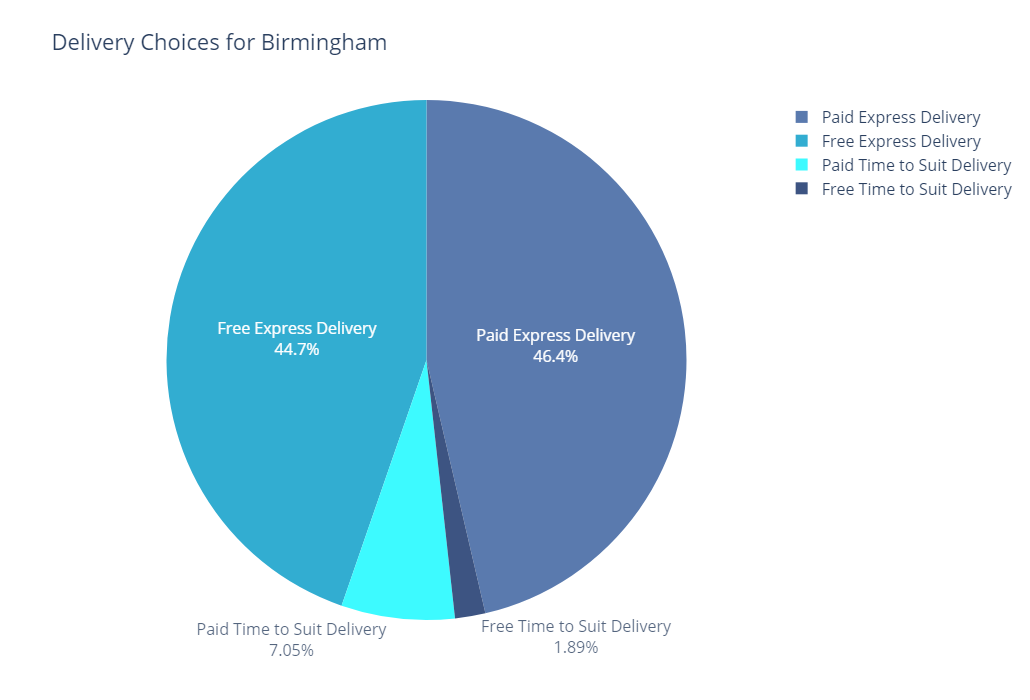

In [80]:
values=[]
labels=[]
values.append(B_df.loc[(B_df['DELIVERY_CHARGE']==0)&(B_df['D_OR_Q'] == 'D'),'PROD_CD'].count())
values.append(B_df.loc[(B_df['DELIVERY_CHARGE']>0)&(B_df['D_OR_Q'] == 'D'),'PROD_CD'].count())
values.append(B_df.loc[(B_df['DELIVERY_CHARGE']==0)&(B_df['D_OR_Q'] == 'Q'),'PROD_CD'].count())
values.append(B_df.loc[(B_df['DELIVERY_CHARGE']>0)&(B_df['D_OR_Q'] == 'Q'),'PROD_CD'].count())

labels=['Free Express Delivery','Paid Express Delivery', 'Free Time to Suit Delivery', 'Paid Time to Suit Delivery']
print(values)

trace1 = go.Pie(
    values = values,
    labels = labels,
    opacity=0.8,
    textinfo='label+percent',
    marker_colors = ['#0099C6','#325A9B','#0D2A63','#0DF9FF'],
    name = "Delivery Charge")

data = [trace1]
layout = go.Layout(title="Delivery Choices for Birmingham",
                   width=700,height=700,font_size=16)
fig = go.Figure(data = data, layout = layout)
fig.show()
#This is Figure 19 in the dissertation

[33824, 39905, 2200, 5990]


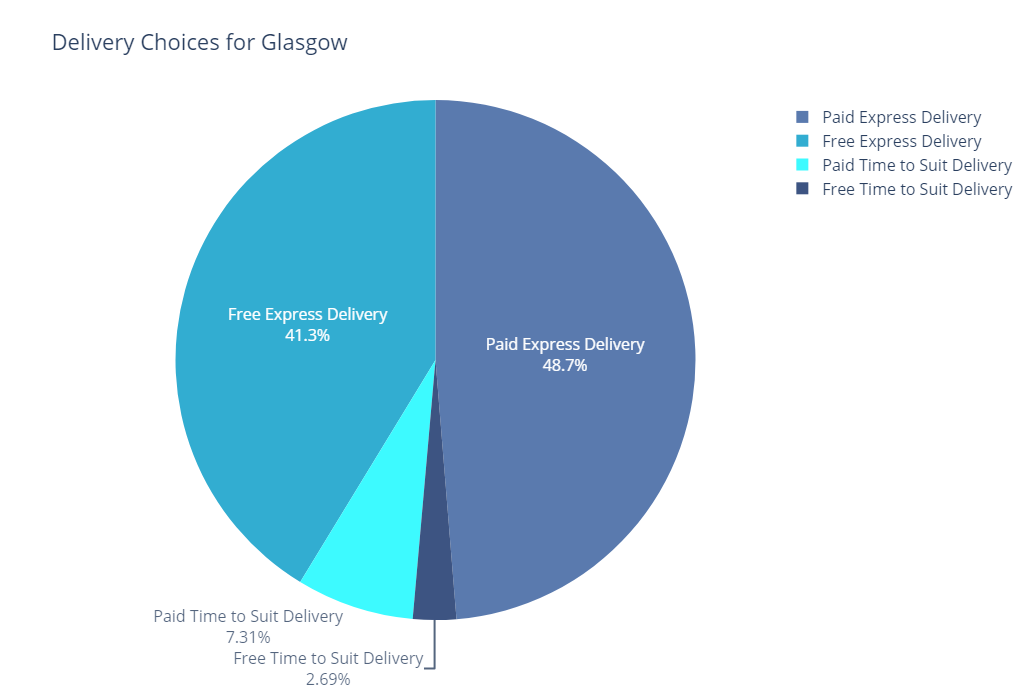

In [81]:
values=[]
labels=[]
values.append(G_df.loc[(G_df['DELIVERY_CHARGE']==0)&(G_df['D_OR_Q'] == 'D'),'PROD_CD'].count())
values.append(G_df.loc[(G_df['DELIVERY_CHARGE']>0)&(G_df['D_OR_Q'] == 'D'),'PROD_CD'].count())
values.append(G_df.loc[(G_df['DELIVERY_CHARGE']==0)&(G_df['D_OR_Q'] == 'Q'),'PROD_CD'].count())
values.append(G_df.loc[(G_df['DELIVERY_CHARGE']>0)&(G_df['D_OR_Q'] == 'Q'),'PROD_CD'].count())

labels=['Free Express Delivery','Paid Express Delivery', 'Free Time to Suit Delivery', 'Paid Time to Suit Delivery']
print(values)

trace1 = go.Pie(
    values = values,
    labels = labels,
    opacity=0.8,
    textinfo='label+percent',
    marker_colors = ['#0099C6','#325A9B','#0D2A63','#0DF9FF'],
    name = "Delivery Charge")

data = [trace1]
layout = go.Layout(title="Delivery Choices for Glasgow",
                   width=700,height=700,font_size=16)
fig = go.Figure(data = data, layout = layout)
fig.show()
#This is Figure 19 in the dissertation

[51534, 40153, 3161, 7040]


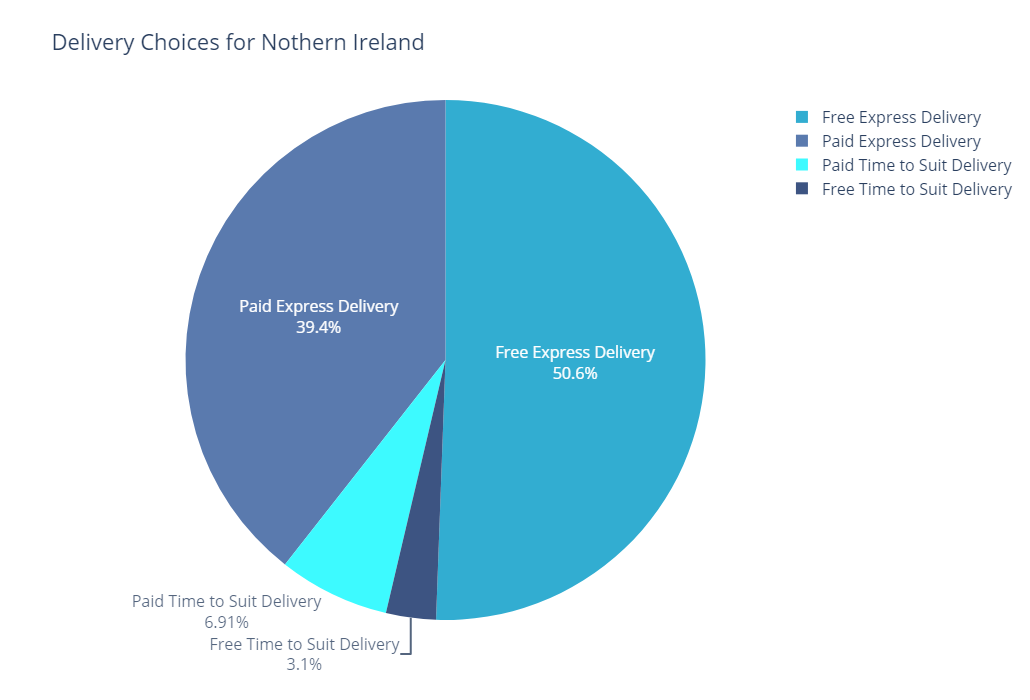

In [82]:
values=[]
labels=[]
values.append(BT_df.loc[(BT_df['DELIVERY_CHARGE']==0)&(BT_df['D_OR_Q'] == 'D'),'PROD_CD'].count())
values.append(BT_df.loc[(BT_df['DELIVERY_CHARGE']>0)&(BT_df['D_OR_Q'] == 'D'),'PROD_CD'].count())
values.append(BT_df.loc[(BT_df['DELIVERY_CHARGE']==0)&(BT_df['D_OR_Q'] == 'Q'),'PROD_CD'].count())
values.append(BT_df.loc[(BT_df['DELIVERY_CHARGE']>0)&(BT_df['D_OR_Q'] == 'Q'),'PROD_CD'].count())

labels=['Free Express Delivery','Paid Express Delivery', 'Free Time to Suit Delivery', 'Paid Time to Suit Delivery']
print(values)

trace1 = go.Pie(
    values = values,
    labels = labels,
    opacity=0.8,
    textinfo='label+percent',
    marker_colors = ['#0099C6','#325A9B','#0D2A63','#0DF9FF'],
    name = "Delivery Charge")

data = [trace1]
layout = go.Layout(title="Delivery Choices for Nothern Ireland",
                   width=700,height=700,font_size=16)
fig = go.Figure(data = data, layout = layout)
fig.show()
#This is Figure 19 in the dissertation

[34287, 38494, 2336, 6024]


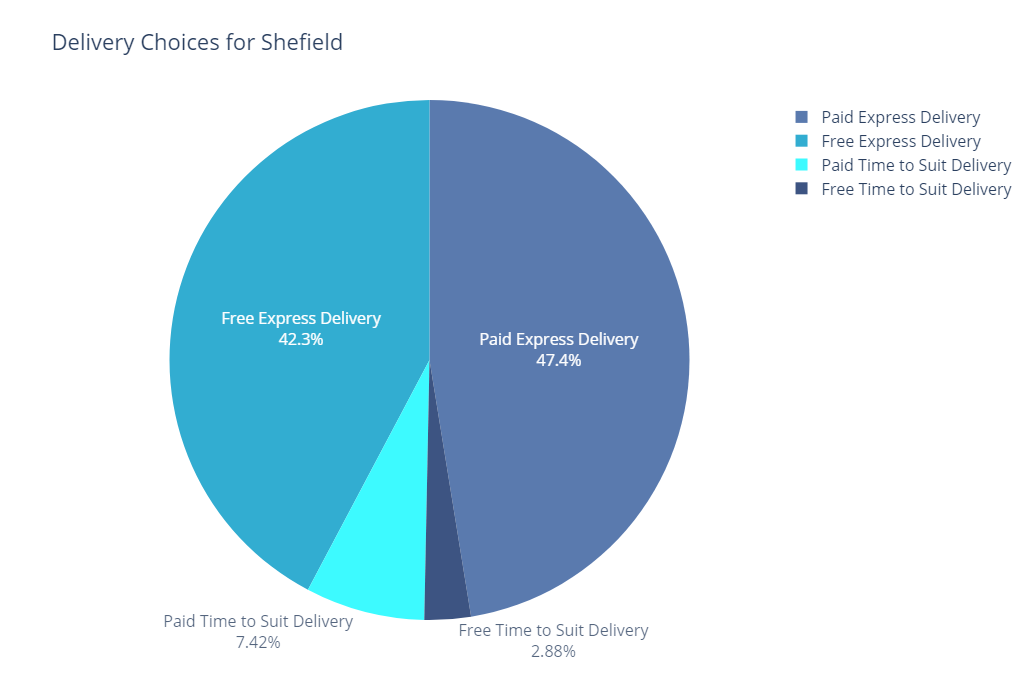

In [83]:
values=[]
labels=[]
values.append(S_df.loc[(S_df['DELIVERY_CHARGE']==0)&(S_df['D_OR_Q'] == 'D'),'PROD_CD'].count())
values.append(S_df.loc[(S_df['DELIVERY_CHARGE']>0)&(S_df['D_OR_Q'] == 'D'),'PROD_CD'].count())
values.append(S_df.loc[(S_df['DELIVERY_CHARGE']==0)&(S_df['D_OR_Q'] == 'Q'),'PROD_CD'].count())
values.append(S_df.loc[(S_df['DELIVERY_CHARGE']>0)&(S_df['D_OR_Q'] == 'Q'),'PROD_CD'].count())

labels=['Free Express Delivery','Paid Express Delivery', 'Free Time to Suit Delivery', 'Paid Time to Suit Delivery']
print(values)

trace1 = go.Pie(
    values = values,
    labels = labels,
    opacity=0.8,
    textinfo='label+percent',
    marker_colors = ['#0099C6','#325A9B','#0D2A63','#0DF9FF'],
    name = "Delivery Charge")

data = [trace1]
layout = go.Layout(title="Delivery Choices for Shefield",
                   width=700,height=700,font_size=16)
fig = go.Figure(data = data, layout = layout)
fig.show()

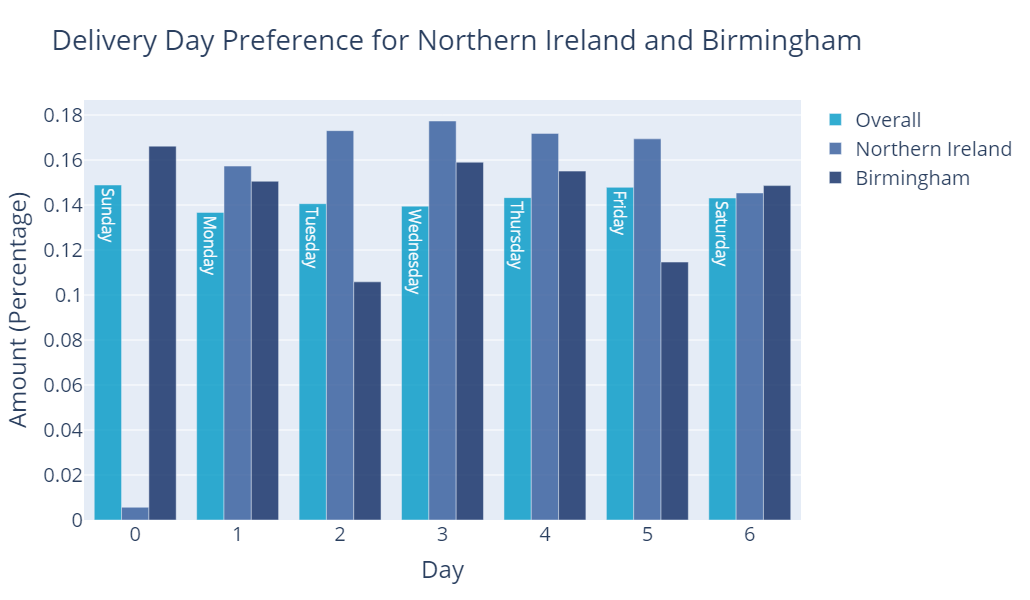

In [85]:
DELIVERY_WEEK_BT_df = BT_df.groupby(['DELIVERY_WEEK']).count()

DELIVERY_WEEK_BT_df = pd.DataFrame(DELIVERY_WEEK_BT_df)

DELIVERY_WEEK_B_df = B_df.groupby(['DELIVERY_WEEK']).count()

DELIVERY_WEEK_B_df = pd.DataFrame(DELIVERY_WEEK_B_df)

DELIVERY_WEEK_G_df = G_df.groupby(['DELIVERY_WEEK']).count()

DELIVERY_WEEK_G_df = pd.DataFrame(DELIVERY_WEEK_G_df)

trace1 = go.Bar(
    x = DELIVERY_WEEK_group_df.index.values,
    y = DELIVERY_WEEK_group_df['PROD_CD']/length_full,
    name = "Overall",
    marker_color='#0099C6',
    opacity=0.8,
    textposition='auto',
    text = ['Sunday', 'Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'])
trace2 = go.Bar(
    x = DELIVERY_WEEK_BT_df.index.values,
    y = DELIVERY_WEEK_BT_df['PROD_CD']/len(BT_df),
    name = "Northern Ireland",
    marker_color='#325A9B',
    opacity=0.8)
    #textposition='auto',
    #text = ['Sunday', 'Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'])
trace3 = go.Bar(
    x = DELIVERY_WEEK_B_df.index.values,
    y = DELIVERY_WEEK_B_df['PROD_CD']/len(B_df),
    name = "Birmingham",
    marker_color='#0D2A63',
    opacity=0.8)


data = [trace1,trace2,trace3]
layout = go.Layout(barmode = "group", title="Delivery Day Preference for Northern Ireland and Birmingham",
                   xaxis= dict(title= 'Day',ticklen= 5,zeroline= False), 
                   yaxis= dict(title= 'Amount (Percentage)',ticklen= 5,zeroline= False),
                   width=1200,height=600,font_size=20,titlefont_size=28)
fig = go.Figure(data = data, layout = layout)
fig.show()
#This is Figure 20 in the dissertation

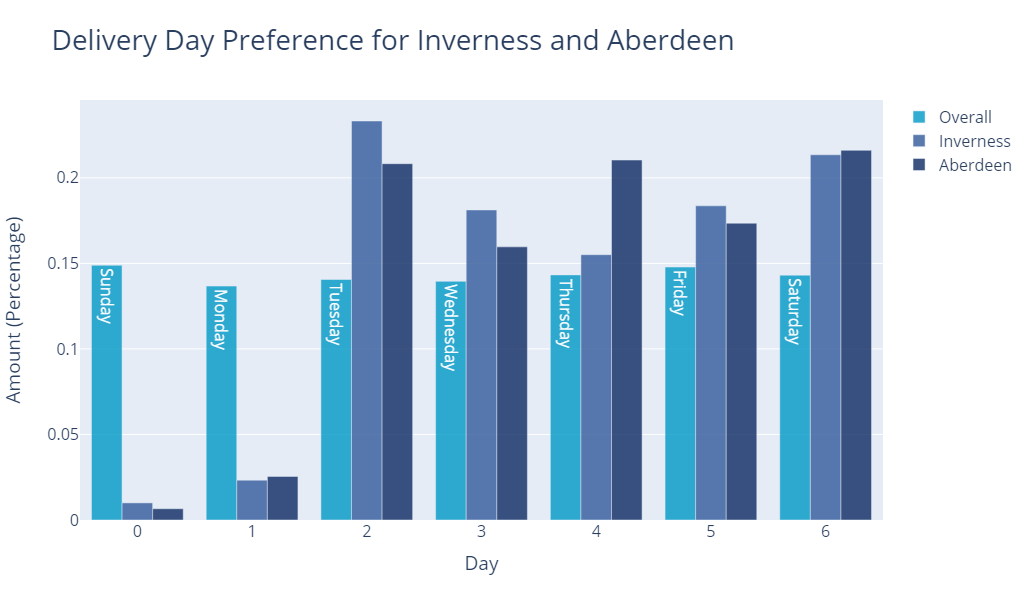

In [86]:
DELIVERY_WEEK_IV_df = IV_df.groupby(['DELIVERY_WEEK']).count()

DELIVERY_WEEK_IV_df = pd.DataFrame(DELIVERY_WEEK_IV_df)

DELIVERY_WEEK_AB_df = AB_df.groupby(['DELIVERY_WEEK']).count()

DELIVERY_WEEK_AB_df = pd.DataFrame(DELIVERY_WEEK_AB_df)

trace1 = go.Bar(
    x = DELIVERY_WEEK_group_df.index.values,
    y = DELIVERY_WEEK_group_df['PROD_CD']/length_full,
    name = "Overall",
    marker_color='#0099C6',
    opacity=0.8,
    textposition='auto',
    text = ['Sunday', 'Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'])
trace2 = go.Bar(
    x = DELIVERY_WEEK_IV_df.index.values,
    y = DELIVERY_WEEK_IV_df['PROD_CD']/len(IV_df),
    name = "Inverness",
    marker_color='#325A9B',
    opacity=0.8)
    #textposition='auto',
    #text = ['Sunday', 'Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'])
trace3 = go.Bar(
    x = DELIVERY_WEEK_AB_df.index.values,
    y = DELIVERY_WEEK_AB_df['PROD_CD']/len(AB_df),
    name = "Aberdeen",
    marker_color='#0D2A63',
    opacity=0.8)


data = [trace1,trace2,trace3]
layout = go.Layout(barmode = "group", title="Delivery Day Preference for Inverness and Aberdeen",
                   xaxis= dict(title= 'Day',ticklen= 5,zeroline= False), 
                   yaxis= dict(title= 'Amount (Percentage)',ticklen= 5,zeroline= False),
                   width=1200,height=600,font_size=16,titlefont_size=28)
fig = go.Figure(data = data, layout = layout)
fig.show()
#This is Figure 18 in the dissertation

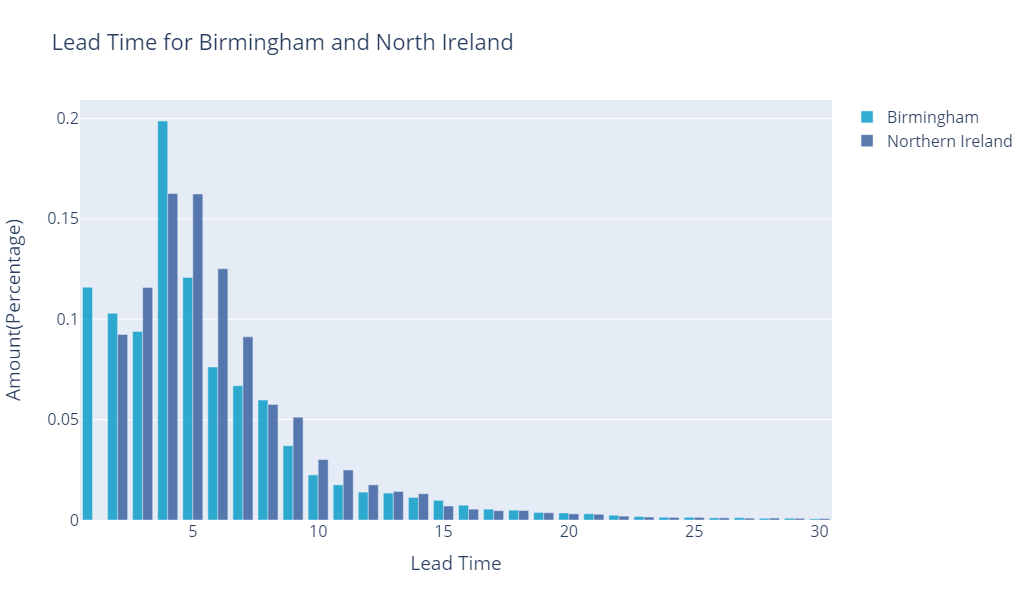

In [87]:
B_LEADTIME_df = B_df.groupby(['LEAD_TIME']).count()
B_LEADTIME_df = pd.DataFrame(B_LEADTIME_df)

BT_LEADTIME_df = BT_df.groupby(['LEAD_TIME']).count()
BT_LEADTIME_df = pd.DataFrame(BT_LEADTIME_df)
B_length = len(B_df)

BT_length = len(BT_df)


trace1 = go.Bar(
    x = B_LEADTIME_df.index.values,
    y = B_LEADTIME_df['PROD_CD']/B_length,
    name = "Birmingham",
    #mode='lines+markers',
    #line_shape='hvh',
    marker_color='#0099C6',
    opacity=0.8)

trace2 = go.Bar(
    x = BT_LEADTIME_df.index.values,
    y = BT_LEADTIME_df['PROD_CD']/BT_length,
    name = "Northern Ireland",
    marker_color='#325A9B',
    #mode='lines+markers',
    #line_shape='hvh',
    opacity=0.8)

data = [trace1,trace2]
layout = go.Layout(barmode = "group", title="Lead Time for Birmingham and North Ireland",
                                      xaxis= dict(title= 'Lead Time',ticklen= 5,zeroline= False), 
                   yaxis= dict(title= 'Amount(Percentage)',ticklen= 5,zeroline= False),
                   width=1200,height=600,font_size=16)
fig = go.Figure(data = data, layout = layout)
fig.show()
#Not used

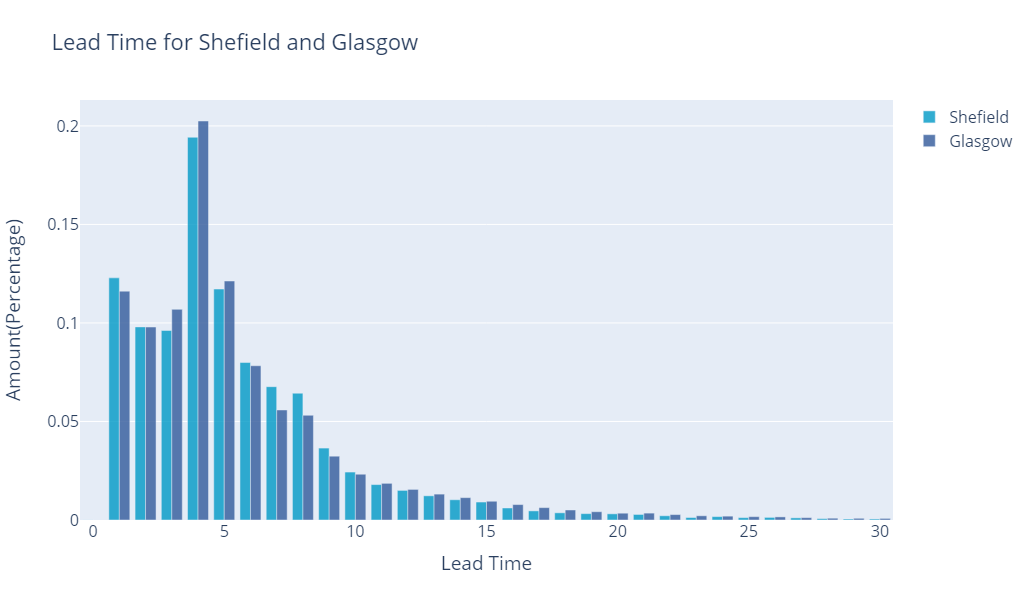

In [88]:
S_LEADTIME_df = S_df.groupby(['LEAD_TIME']).count()
S_LEADTIME_df = pd.DataFrame(S_LEADTIME_df)
G_LEADTIME_df = G_df.groupby(['LEAD_TIME']).count()
G_LEADTIME_df = pd.DataFrame(G_LEADTIME_df)

S_length = len(S_df)
G_length = len(G_df)



trace1 = go.Bar(
    x = S_LEADTIME_df.index.values,
    y = S_LEADTIME_df['PROD_CD']/S_length,
    name = "Shefield",
    #mode='lines+markers',
    #line_shape='hvh',
    marker_color='#0099C6',
    opacity=0.8)

trace2 = go.Bar(
    x = G_LEADTIME_df.index.values,
    y = G_LEADTIME_df['PROD_CD']/G_length,
    name = "Glasgow",
    #mode='lines+markers',
    #line_shape='hvh',
    marker_color='#325A9B',
    opacity=0.8)

data = [trace1,trace2]
layout = go.Layout(barmode = "group", title="Lead Time for Shefield and Glasgow",
                                      xaxis= dict(title= 'Lead Time',ticklen= 5,zeroline= False), 
                   yaxis= dict(title= 'Amount(Percentage)',ticklen= 5,zeroline= False),
                   width=1200,height=600,font_size=16)
fig = go.Figure(data = data, layout = layout)
fig.show()

In [89]:
B_df.describe()

PROD_CD  PLU_RETAIL_PRICE  ORDER_STORE       DLC  DELIVERY_CHARGE  \
count 104379.00         104379.00    104379.00 104379.00        104379.00   
mean  254140.30            385.92      3583.48  74290.00            18.62   
std   142791.81            321.16      1250.99      0.00            25.67   
min      629.00             22.99       110.00  74290.00             0.00   
25%   182025.00            219.99      2388.00  74290.00             0.00   
50%   229099.00            299.00      2874.00  74290.00             5.00   
75%   247321.00            420.00      4944.00  74290.00            30.00   
max   999279.00          12999.00      5230.00  74290.00           120.00   

       CUSTOMER_SEGMENT    VOLUME  BAND_FIFTY  LEAD_TIME  DELIVERY_WEEK  \
count         104379.00 104379.00   104379.00  104379.00      104379.00   
mean               3.94      1.00     1038.65       5.59           2.92   
std                2.28      0.00    12681.63       4.31           2.04   
min                0.00      1.00       50.00       1.00           0.00   
25%                2.00      1.00      250.00       3.00           1.00   
50%                4.00      1.00      300.00       4.00           3.00   
75%                6.00      1.00      450.00       7.00           5.00   
max                7.00      1.00   250000.00      30.00           6.00   

       DELIVERY_WEEKDAY_WEEKEND      WEEE  Installation  
count                 104379.00 104379.00     104379.00  
mean                       0.69      0.27          0.21  
std                        0.46      0.44          0.41  
min                        0.00      0.00          0.00  
25%                        0.00      0.00          0.00  
50%                        1.00      0.00          0.00  
75%                        1.00      1.00          0.00  
max                        1.00      1.00          1.00

In [90]:
BT_df.describe()

PROD_CD  PLU_RETAIL_PRICE  ORDER_STORE       DLC  DELIVERY_CHARGE  \
count 101888.00         101888.00    101888.00 101888.00        101888.00   
mean  255789.79            365.51      3526.73  74440.00            14.18   
std   138479.01            279.41      1258.61      0.00            22.79   
min      629.00             22.99      2088.00  74440.00             0.00   
25%   185303.00            219.00      2413.00  74440.00             0.00   
50%   229583.00            299.00      2448.00  74440.00             0.00   
75%   248194.00            399.00      4944.00  74440.00            20.00   
max   999279.00           6799.00      5220.00  74440.00           120.00   

       CUSTOMER_SEGMENT    VOLUME  BAND_FIFTY  LEAD_TIME  DELIVERY_WEEK  \
count         101888.00 101888.00   101888.00  101888.00      101888.00   
mean               3.93      1.00      816.19       6.27           3.44   
std                2.18      0.00    10485.82       3.94           1.68   
min                0.00      1.00       50.00       2.00           0.00   
25%                2.00      1.00      250.00       4.00           2.00   
50%                4.00      1.00      300.00       5.00           3.00   
75%                6.00      1.00      400.00       8.00           5.00   
max                7.00      1.00   250000.00      30.00           6.00   

       DELIVERY_WEEKDAY_WEEKEND      WEEE  Installation  
count                 101888.00 101888.00     101888.00  
mean                       0.85      0.19          0.18  
std                        0.36      0.39          0.39  
min                        0.00      0.00          0.00  
25%                        1.00      0.00          0.00  
50%                        1.00      0.00          0.00  
75%                        1.00      0.00          0.00  
max                        1.00      1.00          1.00

In [91]:
S_df.describe()

PROD_CD  PLU_RETAIL_PRICE  ORDER_STORE      DLC  DELIVERY_CHARGE  \
count  81141.00          81141.00     81141.00 81141.00         81141.00   
mean  253663.19            362.83      3508.45 74429.64            18.84   
std   140977.27            284.38      1307.93   163.05            25.72   
min      629.00             29.99       110.00 74309.00             0.00   
25%   182027.00            219.00      2281.00 74309.00             0.00   
50%   229090.00            299.00      2464.00 74309.00             5.00   
75%   247097.00            399.00      4944.00 74650.00            30.00   
max   999279.00           7999.00      5220.00 74650.00           120.00   

       CUSTOMER_SEGMENT   VOLUME  BAND_FIFTY  LEAD_TIME  DELIVERY_WEEK  \
count          81141.00 81141.00    81141.00   81141.00       81141.00   
mean               4.18     1.00      776.23       5.51           3.06   
std                2.32     0.00    10025.32       4.18           1.99   
min                0.00     1.00       50.00       0.00           0.00   
25%                2.00     1.00      250.00       3.00           1.00   
50%                5.00     1.00      300.00       4.00           3.00   
75%                6.00     1.00      400.00       7.00           5.00   
max                7.00     1.00   250000.00      30.00           6.00   

       DELIVERY_WEEKDAY_WEEKEND     WEEE  Installation  
count                  81141.00 81141.00      81141.00  
mean                       0.70     0.29          0.21  
std                        0.46     0.45          0.41  
min                        0.00     0.00          0.00  
25%                        0.00     0.00          0.00  
50%                        1.00     0.00          0.00  
75%                        1.00     1.00          0.00  
max                        1.00     1.00          1.00

In [92]:
G_df.describe()

PROD_CD  PLU_RETAIL_PRICE  ORDER_STORE      DLC  DELIVERY_CHARGE  \
count  81919.00          81919.00     81919.00 81919.00         81919.00   
mean  254260.97            368.68      3463.32 74490.00            20.95   
std   140655.98            295.56      1348.53     0.00            26.74   
min      629.00             12.97       672.00 74490.00             0.00   
25%   182026.00            219.00      2368.00 74490.00             0.00   
50%   229088.00            299.00      2804.00 74490.00            10.00   
75%   247241.00            399.00      4944.00 74490.00            37.50   
max   999279.00           6499.99      5220.00 74490.00           120.00   

       CUSTOMER_SEGMENT   VOLUME  BAND_FIFTY  LEAD_TIME  DELIVERY_WEEK  \
count          81919.00 81919.00    81919.00   81919.00       81919.00   
mean               4.06     1.00      784.03       5.61           2.92   
std                2.26     0.00    10053.49       4.45           2.01   
min                0.00     1.00       50.00       1.00           0.00   
25%                2.00     1.00      250.00       3.00           1.00   
50%                4.00     1.00      300.00       4.00           3.00   
75%                6.00     1.00      400.00       7.00           5.00   
max                7.00     1.00   250000.00      30.00           6.00   

       DELIVERY_WEEKDAY_WEEKEND     WEEE  Installation  
count                  81919.00 81919.00      81919.00  
mean                       0.71     0.34          0.25  
std                        0.46     0.47          0.43  
min                        0.00     0.00          0.00  
25%                        0.00     0.00          0.00  
50%                        1.00     0.00          0.00  
75%                        1.00     1.00          1.00  
max                        1.00     1.00          1.00

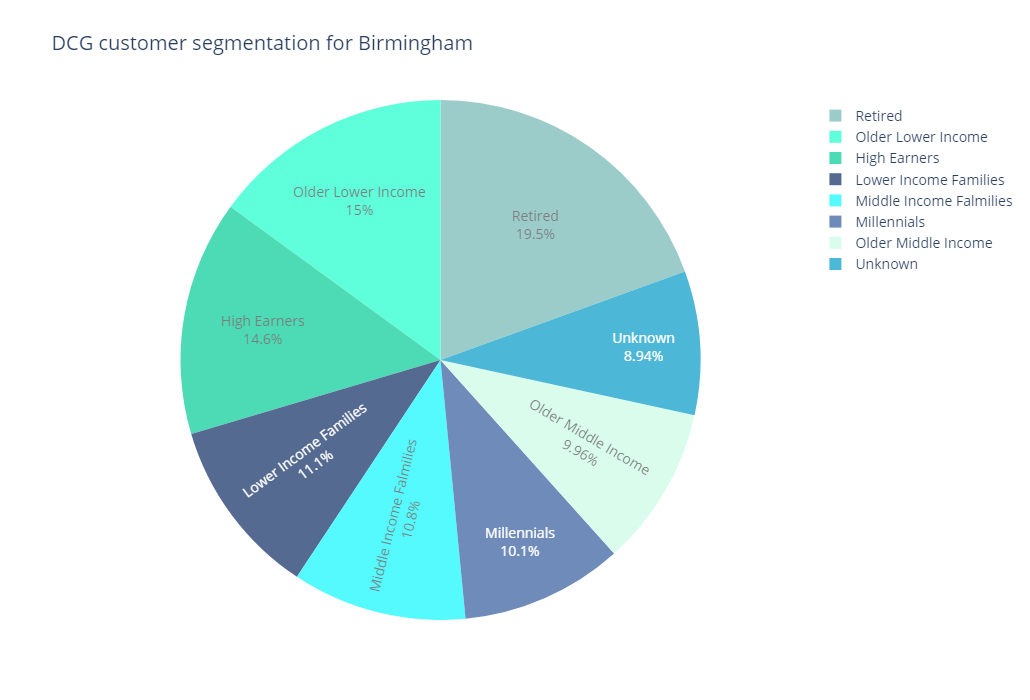

In [95]:
B_df.groupby(['CUSTOMER_SEGMENT']).count()
B_dcg_df =B_df.groupby(['CUSTOMER_SEGMENT']).count()
B_dcg_df = B_dcg_df.sort_index()
values=B_dcg_df['PROD_CD']/B_length
labels=['Unknown','Millennials','Lower Income Families','Middle Income Falmilies','High Earners','Older Lower Income','Older Middle Income','Retired']


trace1 = go.Pie(
    values = values,
    labels = labels,
    textinfo='label+percent',
    opacity=0.7,
    marker_colors = ['#0099C6','#325A9B','#0D2A63','#0DF9FF','#00CC96','#1CFFCE','#C9FBE5','#72B7B2'],
    name = "DCG customer segmentation")

data = [trace1]
layout = go.Layout(title="DCG customer segmentation for Birmingham",
                   width=700,height=700,font_size = 14)
fig = go.Figure(data = data, layout = layout)
fig.show()

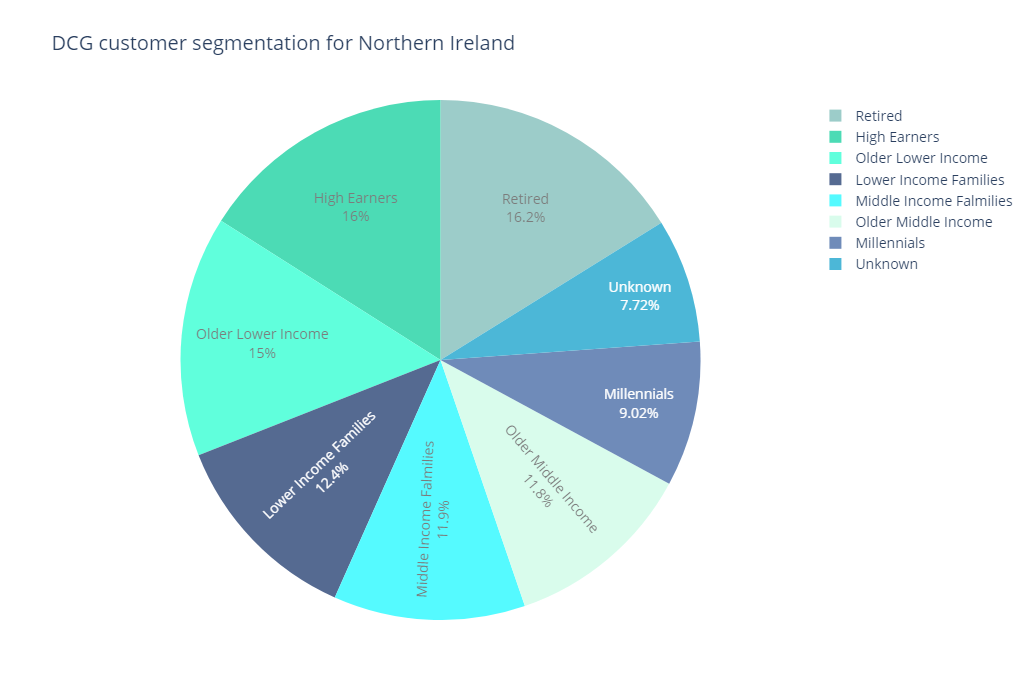

In [96]:
BT_df.groupby(['CUSTOMER_SEGMENT']).count()
BT_dcg_df =BT_df.groupby(['CUSTOMER_SEGMENT']).count()
BT_dcg_df = BT_dcg_df.sort_index()

values=BT_dcg_df['PROD_CD']/B_length
labels=['Unknown','Millennials','Lower Income Families','Middle Income Falmilies','High Earners','Older Lower Income','Older Middle Income','Retired']


trace1 = go.Pie(
    values = values,
    labels = labels,
    textinfo='label+percent',
    opacity=0.7,
    marker_colors = ['#0099C6','#325A9B','#0D2A63','#0DF9FF','#00CC96','#1CFFCE','#C9FBE5','#72B7B2'],
    name = "DCG customer segmentation")

data = [trace1]
layout = go.Layout(title="DCG customer segmentation for Northern Ireland",
                   width=700,height=700,font_size = 14)
fig = go.Figure(data = data, layout = layout)
fig.show()

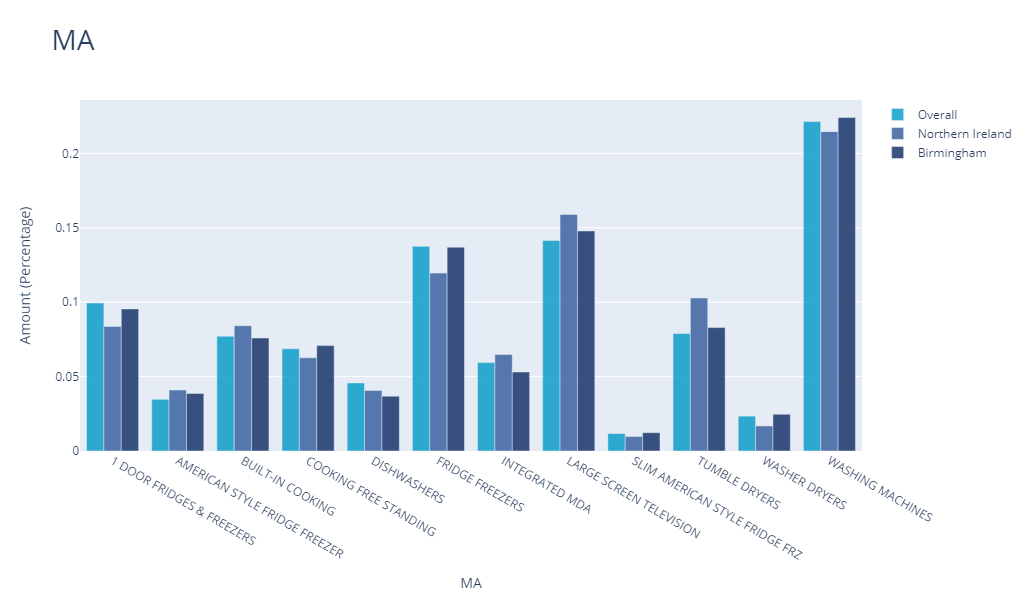

In [98]:
DELIVERY_MA_group_df = delivery_clean_df.groupby(['MA']).count()

DELIVERY_MA_group_df = pd.DataFrame(DELIVERY_MA_group_df)

DELIVERY_MA_BT_df = BT_df.groupby(['MA']).count()

DELIVERY_MA_BT_df = pd.DataFrame(DELIVERY_MA_BT_df)

DELIVERY_MA_B_df = B_df.groupby(['MA']).count()

DELIVERY_MA_B_df = pd.DataFrame(DELIVERY_MA_B_df)

trace1 = go.Bar(
    x = DELIVERY_MA_group_df.index.values,
    y = DELIVERY_MA_group_df['PROD_CD']/length_full,
    name = "Overall",
    marker_color='#0099C6',
    opacity=0.8,
   
    text = DELIVERY_MA_group_df.index.values)

trace2 = go.Bar(
    x = DELIVERY_MA_BT_df.index.values,
    y = DELIVERY_MA_BT_df['PROD_CD']/len(BT_df),
    name = "Northern Ireland",
    marker_color='#325A9B',
    opacity=0.8,
   
    text = DELIVERY_MA_BT_df.index.values)

trace3 = go.Bar(
    x = DELIVERY_MA_B_df.index.values,
    y = DELIVERY_MA_B_df['PROD_CD']/len(B_df),
    name = "Birmingham",
    marker_color='#0D2A63',
    opacity=0.8,
    
    text = DELIVERY_MA_B_df.index.values)

data = [trace1,trace2,trace3]
layout = go.Layout(barmode = "group", title="MA",
                   xaxis= dict(title= 'MA',ticklen= 5,zeroline= False), 
                   yaxis= dict(title= 'Amount (Percentage)',ticklen= 5,zeroline= False),
                   width=1200,height=600,font_size=12,titlefont_size=28)
fig = go.Figure(data = data, layout = layout)
fig.show()
#This is Figure 19 in the dissertation

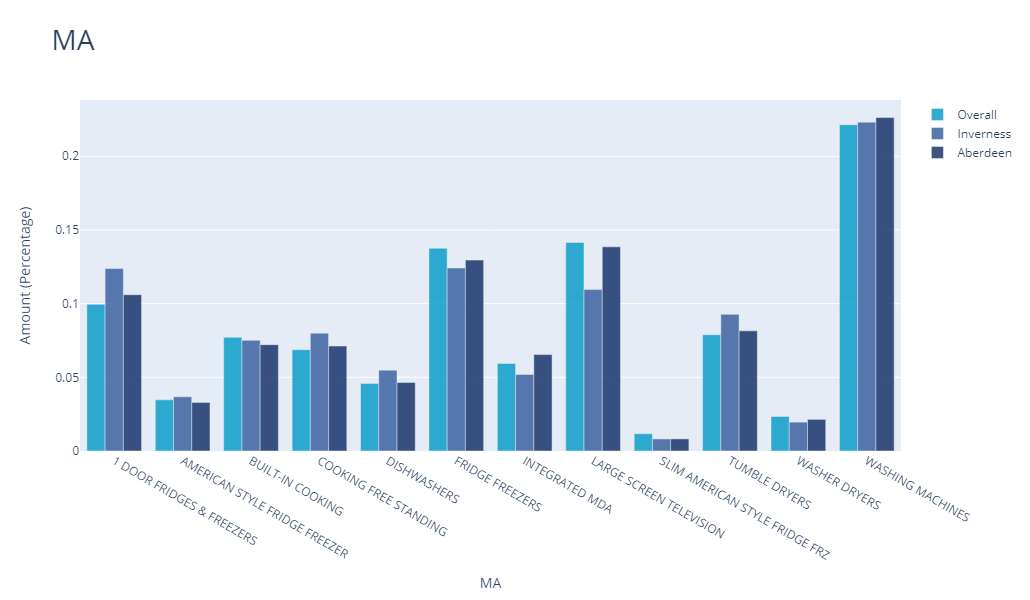

In [100]:
DELIVERY_MA_group_df = delivery_clean_df.groupby(['MA']).count()

DELIVERY_MA_group_df = pd.DataFrame(DELIVERY_MA_group_df)

DELIVERY_MA_IV_df = IV_df.groupby(['MA']).count()

DELIVERY_MA_IV_df = pd.DataFrame(DELIVERY_MA_IV_df)

DELIVERY_MA_AB_df = AB_df.groupby(['MA']).count()

DELIVERY_MA_AB_df = pd.DataFrame(DELIVERY_MA_AB_df)

trace1 = go.Bar(
    x = DELIVERY_MA_group_df.index.values,
    y = DELIVERY_MA_group_df['PROD_CD']/length_full,
    name = "Overall",
    marker_color='#0099C6',
    opacity=0.8,
   
    text = DELIVERY_MA_group_df.index.values)

trace2 = go.Bar(
    x = DELIVERY_MA_IV_df.index.values,
    y = DELIVERY_MA_IV_df['PROD_CD']/len(IV_df),
    name = "Inverness",
    marker_color='#325A9B',
    opacity=0.8,
   
    text = DELIVERY_MA_BT_df.index.values)

trace3 = go.Bar(
    x = DELIVERY_MA_AB_df.index.values,
    y = DELIVERY_MA_AB_df['PROD_CD']/len(AB_df),
    name = "Aberdeen",
    marker_color='#0D2A63',
    opacity=0.8,
    
    text = DELIVERY_MA_AB_df.index.values)

data = [trace1,trace2,trace3]
layout = go.Layout(barmode = "group", title="MA",
                   xaxis= dict(title= 'MA',ticklen= 5,zeroline= False), 
                   yaxis= dict(title= 'Amount (Percentage)',ticklen= 5,zeroline= False),
                   width=1200,height=600,font_size=12,titlefont_size=28)
fig = go.Figure(data = data, layout = layout)
fig.show()
#Not Used

In [101]:
delivery_clean_df[delivery_clean_df['SRV_TYPS']=='D'].count()/len(delivery_clean_df)

MA                         0.55
PROD_CD                    0.55
BRAND                      0.55
PLU_RETAIL_PRICE           0.55
ORDER_STORE                0.55
ORDER_DATE                 0.55
DELIVERY_DATE              0.55
OUTCODE                    0.55
DLC                        0.55
SRV_TYPS                   0.55
DELIVERY_CHARGE            0.55
CUSTOMER_SEGMENT           0.55
VOLUME                     0.55
BAND_FIFTY                 0.55
BOX_TYPE                   0.55
LEAD_TIME                  0.55
DELIVERY_WEEK              0.55
DELIVERY_WEEKDAY_WEEKEND   0.55
WEEE                       0.55
AREA                       0.55
D_OR_Q                     0.55
Installation               0.55
MA_CLEAN                   0.55
dtype: float64

### MA

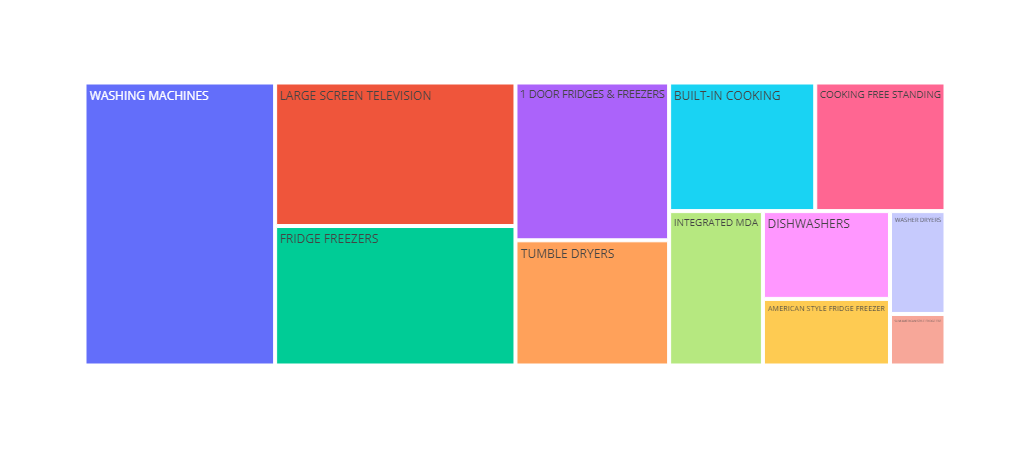

In [6]:
import plotly.express as px

str = DELIVERY_MA_group_df.index.values

fig = px.treemap(DELIVERY_MA_group_df, path=[DELIVERY_MA_group_df.index.values], values='BRAND')
fig.show()
#This is Figure 21 in the dissertation

In [7]:
DELIVERY_MA_group_df['BRAND']

MA
1 DOOR FRIDGES & FREEZERS         375066
AMERICAN STYLE FRIDGE FREEZER     130902
BUILT-IN COOKING                  290705
COOKING FREE STANDING             259111
DISHWASHERS                       172523
FRIDGE FREEZERS                   518566
INTEGRATED MDA                    223960
LARGE SCREEN TELEVISION           533574
SLIM AMERICAN STYLE FRIDGE FRZ     44274
TUMBLE DRYERS                     297570
WASHER DRYERS                      88334
WASHING MACHINES                  834507
Name: BRAND, dtype: int64

In [26]:
both = washing_machine_df.loc[(washing_machine_df['WEEE']==1)&(washing_machine_df['Installation'] == 1),'PROD_CD'].count()
weee = washing_machine_df.loc[(washing_machine_df['WEEE']==1)&(washing_machine_df['Installation'] == 0),'PROD_CD'].count()
installation = washing_machine_df.loc[(washing_machine_df['WEEE']==0)&(washing_machine_df['Installation'] == 1),'PROD_CD'].count()
nothing = washing_machine_df.loc[(washing_machine_df['WEEE']==0)&(washing_machine_df['Installation'] == 0),'PROD_CD'].count()
print(len(washing_machine_df)-both-weee-installation)

344959


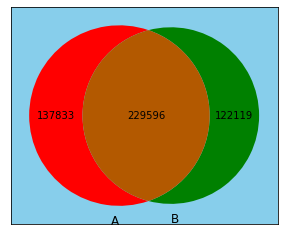

In [20]:
# Library
from matplotlib import pyplot as plt
from matplotlib_venn import venn2
 
# Basic Venn
v = venn2( (weee, installation, both), alpha = 1 )
 
# Change Backgroud
plt.gca().set_facecolor('skyblue')
# 显示边框
plt.gca().set_axis_on()


In [ ]:
washingmachine_both_week_df = washing_machine_df.loc[(washing_machine_df['WEEE']==1)&(washing_machine_df['Installation'] == 1)].groupby('DELIVERY_WEEK').count()

washingmachine_both_week_df = pd.DataFrame(washingmachine_both_week_df)

washingmachine_weee_week_df = washing_machine_df.loc[(washing_machine_df['WEEE']==1)&(washing_machine_df['Installation'] == 0)].groupby('DELIVERY_WEEK').count()

washingmachine_weee_week_df = pd.DataFrame(washingmachine_weee_week_df)

washingmachine_instal_week_df = washing_machine_df.loc[(washing_machine_df['WEEE']==0)&(washing_machine_df['Installation'] == 1)].groupby('DELIVERY_WEEK').count()

washingmachine_instal_week_df = pd.DataFrame(washingmachine_instal_week_df)

washingmachine_nothing_week_df = washing_machine_df.loc[(washing_machine_df['WEEE']==0)&(washing_machine_df['Installation'] == 0)].groupby('DELIVERY_WEEK').count()

washingmachine_nothing_week_df = pd.DataFrame(washingmachine_nothing_week_df)

trace1 = go.Bar(
    x = washingmachine_both_week_df.index.values,
    y = washingmachine_both_week_df['PROD_CD']/both,
    name = "DELIVERY_WEEK",
    marker_color='#0099C6',
    opacity=0.8,
    textposition='auto',
    text = ['Sunday', 'Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'])

trace2 = go.Bar(
    x = washingmachine_weee_week_df.index.values,
    y = washingmachine_weee_week_df['PROD_CD']/weee,
    name = "DELIVERY_WEEK",
    marker_color='#0099C6',
    opacity=0.8)

trace3 = go.Bar(
    x = washingmachine_instal_week_df.index.values,
    y = washingmachine_instal_week_df['PROD_CD']/installation,
    name = "DELIVERY_WEEK",
    marker_color='#0099C6',
    opacity=0.8)

trace4 = go.Bar(
    x = washingmachine_nothing_week_df.index.values,
    y = washingmachine_nothing_week_df['PROD_CD']/nothing,
    name = "DELIVERY_WEEK",
    marker_color='#0099C6',
    opacity=0.8)
data = [trace1,trace2,trace3,trace4]
layout = go.Layout(barmode = "group", title="Delivery Day Preference",
                   xaxis= dict(title= 'Day',ticklen= 5,zeroline= False), 
                   yaxis= dict(title= 'Amount (Percentage)',ticklen= 5,zeroline= False),
                   width=1200,height=600,font_size=16,titlefont_size=28)
fig = go.Figure(data = data, layout = layout)
fig.show()
#This is Figure 22 in the dissertation